<font size="6"><b>Exploratory Data Analysis - Part I</b></font>

Clearly the pre-processing/cleaning notebook already represents a part of the EDA, but since that one was rather large, I thought it would be better to put all the visualizations on a separate one to make it easier to follow. There might be some additional cleaning if necessary on this notebook, of some more feature engineer which will be dictated as I try to answer some of the key questions related to delays. 



# Libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
pd.set_option('display.max_columns', None)
import datetime, warnings, scipy
warnings.filterwarnings("ignore")

# Data Loading and QC

In [2]:
df1 = pd.read_csv('df1.csv', index_col=0)
df1.head(3).append(df1.tail(3))

,FlightDate,Operating_Airline,Flight_Number_Operating_Airline,Origin,Dest,CRSDepTime,DepDelay,TaxiOut,WheelsOff,WheelsOn,TaxiIn,DepDel15,CRSArrTime,ArrDelay,CRSElapsedTime,ActualElapsedTime,AirTime,Distance,DAY,MONTH,MONTH_AB,FLIGHT_STATUS
0,2022-04-04,CommutAir,4301,Grand Junction,Denver,2,-10.0,17.0,2,3,8.0,0.0,3,-17.0,72.0,65.0,40.0,212.0,4,4,Apr,0
1,2022-04-04,CommutAir,4299,Harlingen,Houston,2,-4.0,16.0,2,2,9.0,0.0,2,-1.0,77.0,80.0,55.0,295.0,4,4,Apr,0
2,2022-04-04,CommutAir,4298,Durango,Denver,3,-15.0,21.0,3,3,14.0,0.0,3,-3.0,70.0,82.0,47.0,251.0,4,4,Apr,0
4078310,2022-03-31,Republic Airways,3658,Chantilly,Pittsburgh,3,195.0,14.0,4,4,5.0,1.0,4,180.0,71.0,56.0,37.0,182.0,31,3,Mar,1
4078312,2022-03-19,Republic Airways,3484,Newark,Memphis,4,154.0,14.0,4,1,5.0,1.0,4,135.0,182.0,163.0,144.0,946.0,19,3,Mar,1
4078315,2022-03-08,Republic Airways,3413,Albany,Chicago,3,378.0,19.0,4,1,7.0,1.0,4,381.0,158.0,161.0,135.0,723.0,8,3,Mar,1


In [3]:
df1.shape

(3863219, 22)

In [4]:
df1.isna().sum()

FlightDate                         0
Operating_Airline                  0
Flight_Number_Operating_Airline    0
Origin                             0
Dest                               0
CRSDepTime                         0
DepDelay                           0
TaxiOut                            0
WheelsOff                          0
WheelsOn                           0
TaxiIn                             0
DepDel15                           0
CRSArrTime                         0
ArrDelay                           0
CRSElapsedTime                     0
ActualElapsedTime                  0
AirTime                            0
Distance                           0
DAY                                0
MONTH                              0
MONTH_AB                           0
FLIGHT_STATUS                      0
dtype: int64

In [5]:
df1.columns

Index(['FlightDate', 'Operating_Airline', 'Flight_Number_Operating_Airline',
       'Origin', 'Dest', 'CRSDepTime', 'DepDelay', 'TaxiOut', 'WheelsOff',
       'WheelsOn', 'TaxiIn', 'DepDel15', 'CRSArrTime', 'ArrDelay',
       'CRSElapsedTime', 'ActualElapsedTime', 'AirTime', 'Distance', 'DAY',
       'MONTH', 'MONTH_AB', 'FLIGHT_STATUS'],
      dtype='object')

For visual and practicality purposes I will rearrange the columns based on my preference:  

In [6]:
df1 = df1[
          
         ['FlightDate', 'Operating_Airline', 
       'Origin', 'Dest', 'CRSDepTime', 'DepDelay', 'TaxiOut', 'WheelsOff',
       'WheelsOn', 'TaxiIn', 'CRSArrTime', 'ArrDelay',
       'CRSElapsedTime', 'ActualElapsedTime', 'AirTime', 'Distance', 'DAY',
       'MONTH', 'MONTH_AB', 'FLIGHT_STATUS']]
df1.head(2)

,FlightDate,Operating_Airline,Origin,Dest,CRSDepTime,DepDelay,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,CRSElapsedTime,ActualElapsedTime,AirTime,Distance,DAY,MONTH,MONTH_AB,FLIGHT_STATUS
0,2022-04-04,CommutAir,Grand Junction,Denver,2,-10.0,17.0,2,3,8.0,3,-17.0,72.0,65.0,40.0,212.0,4,4,Apr,0
1,2022-04-04,CommutAir,Harlingen,Houston,2,-4.0,16.0,2,2,9.0,2,-1.0,77.0,80.0,55.0,295.0,4,4,Apr,0


# Visualizations - Single Plots

## Total Number of Flights per Airline

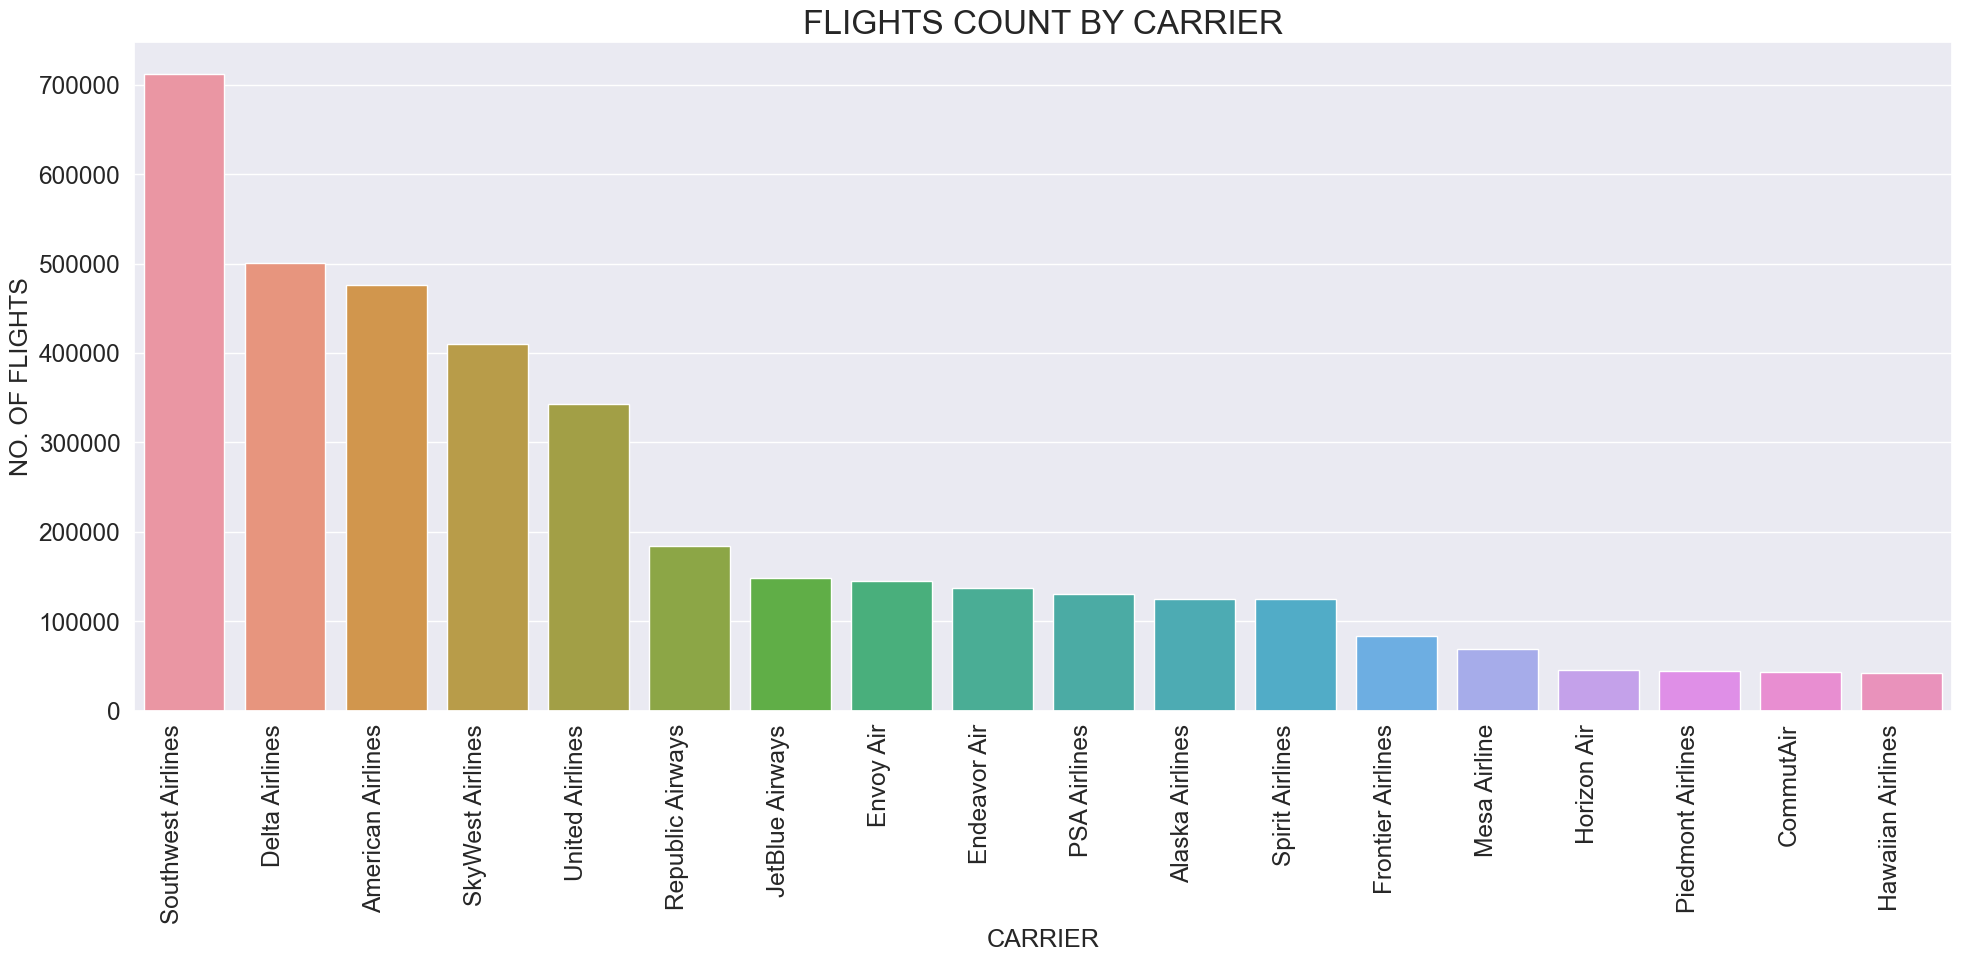

In [9]:
plt.figure(figsize=(20, 10))
sns.set(font_scale=1.6)
axis = sns.countplot(x=df1['Operating_Airline'], data=df1, order=df1['Operating_Airline'].value_counts().iloc[0:18].index, orient="v")
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha='right')
plt.title('FLIGHTS COUNT BY CARRIER', fontsize=24)
plt.xlabel('CARRIER', fontsize=18)
plt.ylabel('NO. OF FLIGHTS', fontsize=18)
plt.tight_layout()
plt.show()

In case you are interested in double checking the number of flights per airline, you can see them below on the .value_counts() output:

In [10]:
df1.Operating_Airline.value_counts()

Southwest Airlines    712246
Delta Airlines        500710
American Airlines     475871
SkyWest Airlines      410347
United Airlines       342487
Republic Airways      183728
JetBlue Airways       148527
Envoy Air             144698
Endeavor Air          136487
PSA Airlines          129792
Alaska Airlines       124933
Spirit Airlines       124760
Frontier Airlines      83810
Mesa Airline           68407
Horizon Air            45840
Piedmont Airlines      44699
CommutAir              42715
Hawaiian Airlines      41821
Air Wisconsin          38774
GoJet Airlines         31350
Allegiant Air          31217
Name: Operating_Airline, dtype: int64

This is quite an interesting plot to start with as it already tells us which are the airlines with the most domestic flights in the US:<br>

<b>1. Southwest Airlines</b><br>
<b>2. Delta Airlines</b><br>
<b>3. American Airlines</b><br> 
<b>4. SkyWest Airlines</b><br>
<b>5. United Airlines</b><br>

Now the question to ask ourselves would be: if the top 5 airlines in terms of number of flight, are also the best in terms of arriving on time? Let's see which are the airlines with the most delayed flight to try to answer this:

## Number of Delayed Flights by Airline

In order to calculate the number of delayed flights, I will use the engineered column FLIGHT_STATUS by adding all it's values per airline and sorting them in descending order:

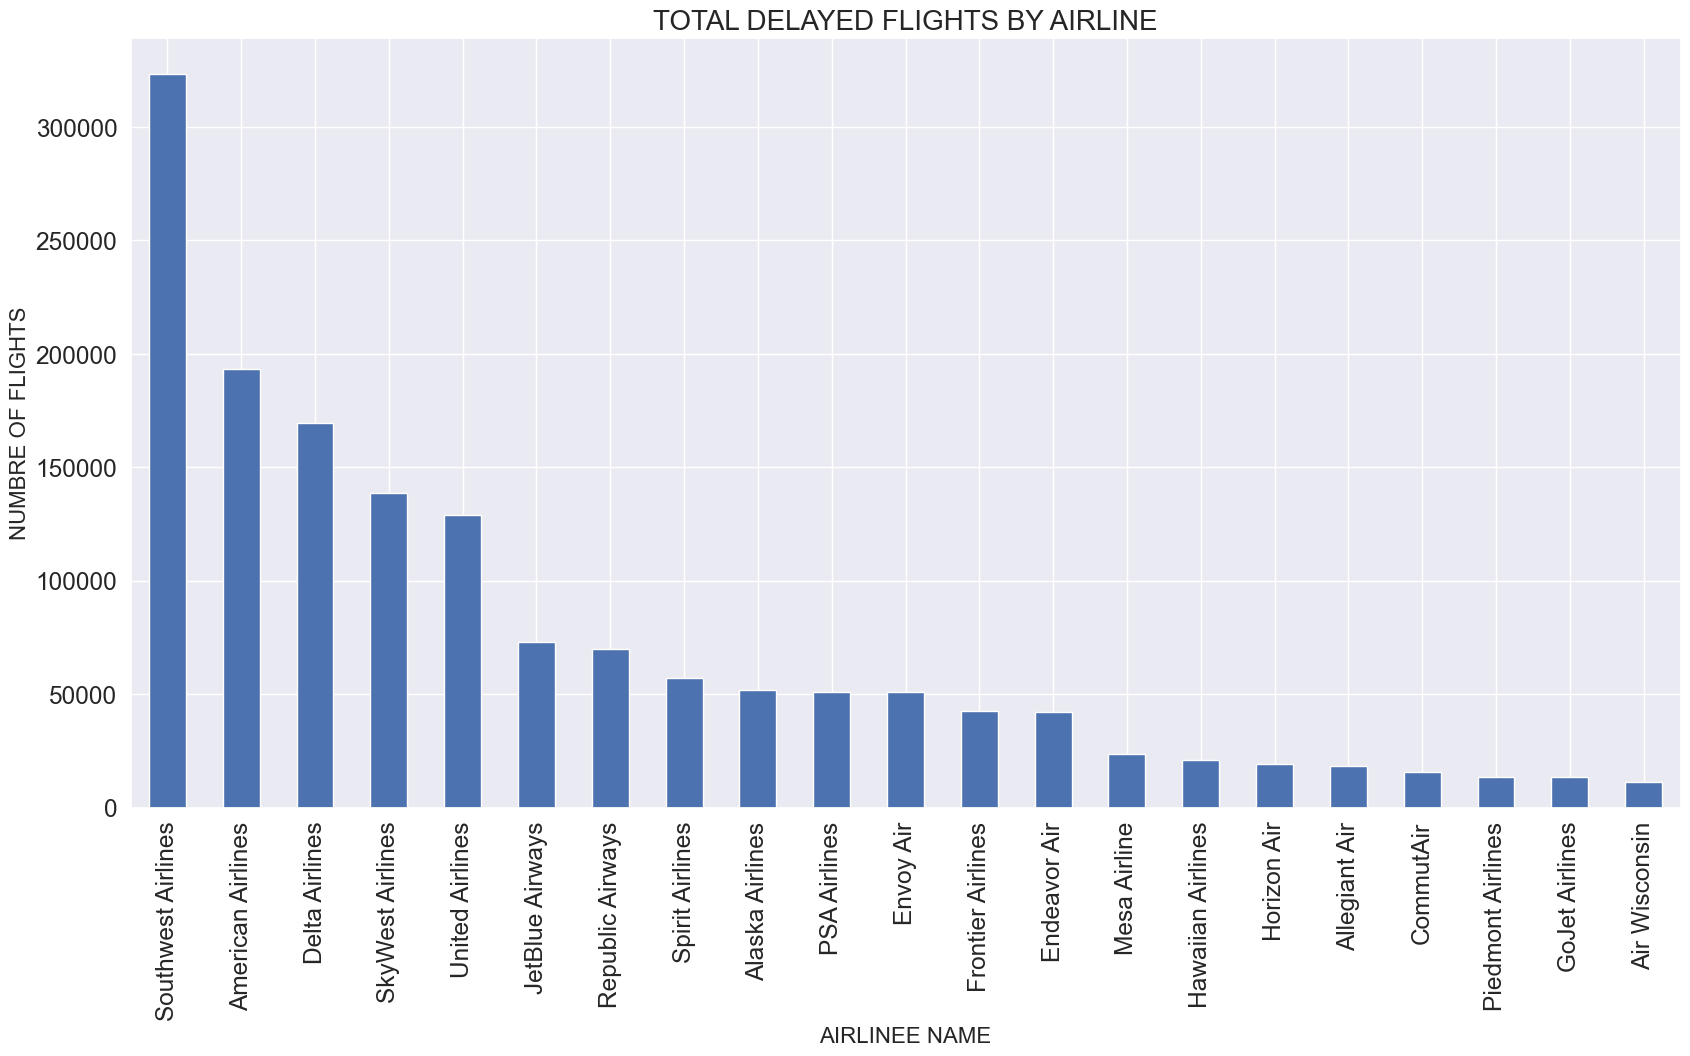

In [11]:
plt.figure(figsize=(20, 10))
df1.groupby('Operating_Airline').FLIGHT_STATUS.sum().sort_values(ascending=False).plot.bar()
plt.title('TOTAL DELAYED FLIGHTS BY AIRLINE', fontsize=20)
plt.xlabel('AIRLINEE NAME', fontsize=16)
plt.ylabel('NUMBRE OF FLIGHTS', fontsize=16)
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)
plt.show()

From this plot we can now extract the top 5 airlines with the most delayed flights, which are:<br>

<b>1. Southwest Airlines</b><br>
<b>2. American Airlines</b><br>
<b>3. SkyWest Airlines</b><br>
<b>4. Delta Airlines</b><br>
<b>5. United Airlines</b><br>

An airline that stands out of the pack is Republic Airways, they have the sixth largest number of flights, and they are ranked number 9 out of 18 in terms of delayed flights. I still have not calculated the <b>percentage of delayed flights</b> and <b>the average delay time per airline</b>, so lets get into that, as that might be a better representation of how the airlines really perform.

## Percentage of delayed flights per airline

The first thing to calculate is the overall percentage of delayed flights so that we can do proper comparisons with each airline. In other words, airlines would want to be below the average percentage of delayed flights to be in an acceptable position, so that magic number will represent our threshold. Airlines above would be by common sense the ones that travelers would want to avoid as it means you those will have the most delays.

In [12]:
df1.FLIGHT_STATUS.value_counts(normalize=True)

0    0.604725
1    0.395275
Name: FLIGHT_STATUS, dtype: float64

Lets first remember that the 0 represents flights that arrive on time, and the 1 the delayed flights, therefore, 37.52% of flights are delayed and that is a rather high percentage, meaning that around 1 out of every 3 flights is normally delayed.<br>

Lets see each Airline now. How do we do this? I will engineer some data and create a new dataframe with it so that I can generate a couple of plots from it. The steps to do that are the following:<br>

1. Create a new dataframe with only the columns of interest: 'OP_CARRIER' and 'FLIGHT_STATUS'<br>
2. Check the shape of the dataframe to make sure that we have not missed any rows
3. Do a non-normalize .value_counts() to know the number of delayed flights<br>
4. Create a temp_1 dataframe doing a groupby OP_CARRIER and FLIGHT_STATUS so that all the 1s (ones) are added and assign to their corresponding airline<br>
5. Create a temp_2 dataframe directly from the value_counts() over the OP_CARRIER to get the total number of flights again, rename_axis to OP_CARRIER and reset_index to TOTAL_FLIGHTS<br>
6. Merge the test_1 and test_2 dataframes on the OP_CARRIER column<br>
7. Create a new column that will represent the percentage of delayed flights
8. Display the entire dataframe to QC it and if necessary rename any columns<br>
9. Do a quick sum of all the FLIGHT_STATUS column and compare it to the output from the non-normalize .value_counts()<br>
10. Plot the results with a horizontal line representing our threshold value of 37.52%

In [13]:
# 1. Creating the new dataframe with the columns of my interest
df1_PFD = df1[['Operating_Airline', 'FLIGHT_STATUS']]
df1_PFD.head()

,Operating_Airline,FLIGHT_STATUS
0,CommutAir,0
1,CommutAir,0
2,CommutAir,0
3,CommutAir,0
4,CommutAir,1


In [14]:
# 2. Shape to check the size of the dataframe and that we have not lost any rows for any reason
df1_PFD.shape

(3863219, 2)

In [15]:
# 3. Non-normalize value_count()
df1_PFD.FLIGHT_STATUS.value_counts()

0    2336185
1    1527034
Name: FLIGHT_STATUS, dtype: int64

In [16]:
# 4. Create another dataframe (test_1) grouping the airline names and adding all the FLIGHT_STATUS values
# This way you will obtain all the delayed flights
test_1 = df1_PFD.groupby(['Operating_Airline']).sum().reset_index()

# 5. Create another dataframe (test_2) from the value_counts directly so that it has all the flights added per airline
# Rename the axis to OP_CARRIER and reset_index to TOTAL_FLIGHTS
test_2 = df1.Operating_Airline.value_counts().rename_axis('Operating_Airline').reset_index(name='TOTAL_FLIGHTS')

# 6. Merge the two dataframes (test_1 and test_2) using the OP_CARRIER as the common column
df_fp = pd.merge(test_1, test_2, on='Operating_Airline')

# 7. Create a new column that will represent the percentage of delay flights
df_fp['PERCENTAGE_DELAYED'] = round((df_fp['FLIGHT_STATUS']*100)/df_fp['TOTAL_FLIGHTS'], 2)
df_fp.rename({'FLIGHT_STATUS': 'DELAYED_FLIGHTS'}, axis=1, inplace=True)

# 8. Display the entire dataframe
df_fp.head(20)

,Operating_Airline,DELAYED_FLIGHTS,TOTAL_FLIGHTS,PERCENTAGE_DELAYED
0,Air Wisconsin,11427,38774,29.47
1,Alaska Airlines,51824,124933,41.48
2,Allegiant Air,18139,31217,58.11
3,American Airlines,193430,475871,40.65
4,CommutAir,15547,42715,36.40
5,Delta Airlines,169378,500710,33.83
6,Endeavor Air,41997,136487,30.77
7,Envoy Air,50799,144698,35.11
8,Frontier Airlines,42476,83810,50.68
9,GoJet Airlines,13290,31350,42.39


So there we have our dataframe alphabetically ordered with the three columns of our interest:<br>

* DELAYED_FLIGHTS<br>
* TOTAL_FLIGHTS<br>
* PERCENTAGE_DELAYED<br>

In [17]:
# 9. Double checking that that total delayed flights match from both sources
SUM = df_fp.DELAYED_FLIGHTS.sum()
print('Total number of delayed flights:', SUM)

Total number of delayed flights: 1527034


Everything seems to have worked just fine, so now to the plot that will help visualize really fast the airline's performances

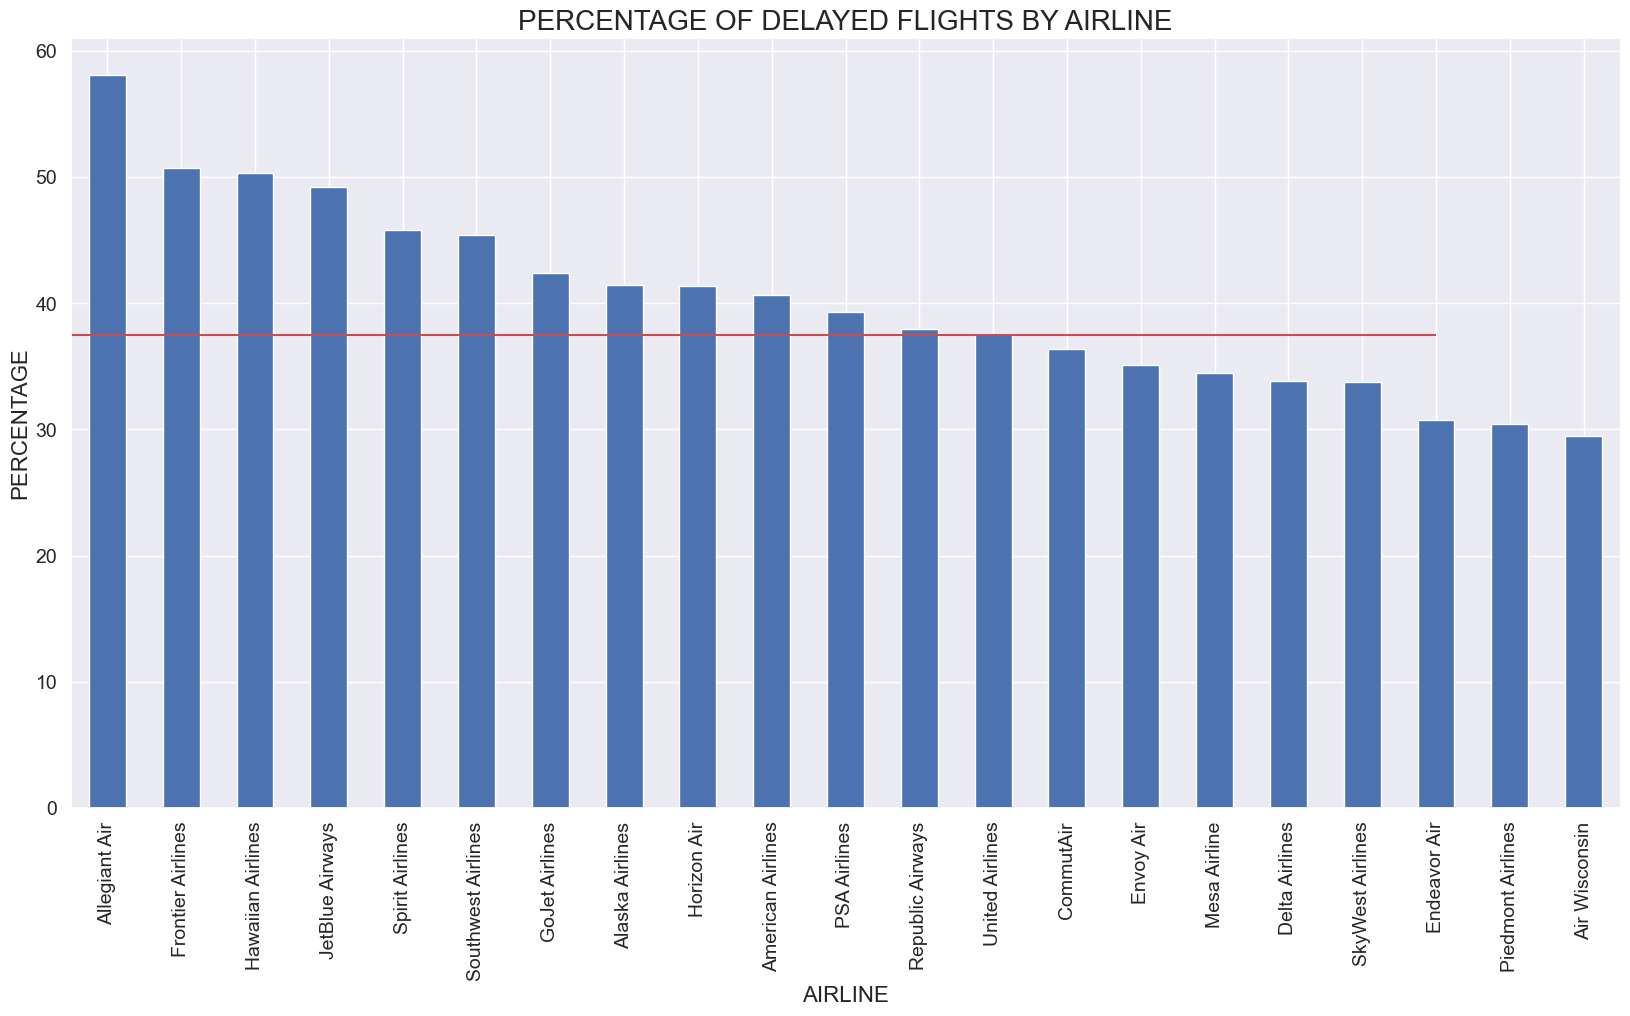

In [18]:
# 10. Plot with the 37.52% threshold value as a horizontal red line
plt.figure(figsize=(20, 10))
df_fp.groupby('Operating_Airline').PERCENTAGE_DELAYED.sum().sort_values(ascending=False).plot.bar(fontsize=14)
plt.hlines(y=37.52, xmin=-1, xmax=18, colors='r', linestyles='solid', label='cutoff')
plt.title('PERCENTAGE OF DELAYED FLIGHTS BY AIRLINE', fontsize=20)
plt.xlabel('AIRLINE', fontsize=16)
plt.ylabel('PERCENTAGE', fontsize=16)
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)
plt.show()

This is really interesting, so lets write down a few <b>OBSERVATIONSS</b>:

* Delta Airlines is the second airline with the highest number of flights, at the same time is the forth with the highest number of delayed flights, but in terms of percentage of delayed flights, it is the airline with the best percentage at 29.50%. That represents 8% below the threshold.<br>

* Southwest Airlines has the most flights and most delayed flights as well, but as our last plot suggests, it is not the worst, it is the 5th worst and still is above the threshold value by over 3%, so definitely not great compared to Delta Airlines<br>

* SkyWest and United Airlines, are the number 4 and 5 respectively in terms of number of flights, and third and 5th in terms of number of delayed flights. However, both are in a good position in terms of percentages of delayed flights by being below the threshold. So a couple more that are performing well.

Later on this notebook I will chose a few of these plots and put them together on a composite subplots so that the comparison is made easier, and at that time I will add more observations. For the time being, lets keep on analyzing our data.


## Total Minutes Delayed by Airline

This next plot is quite interesting because it looks at the total number of minutes

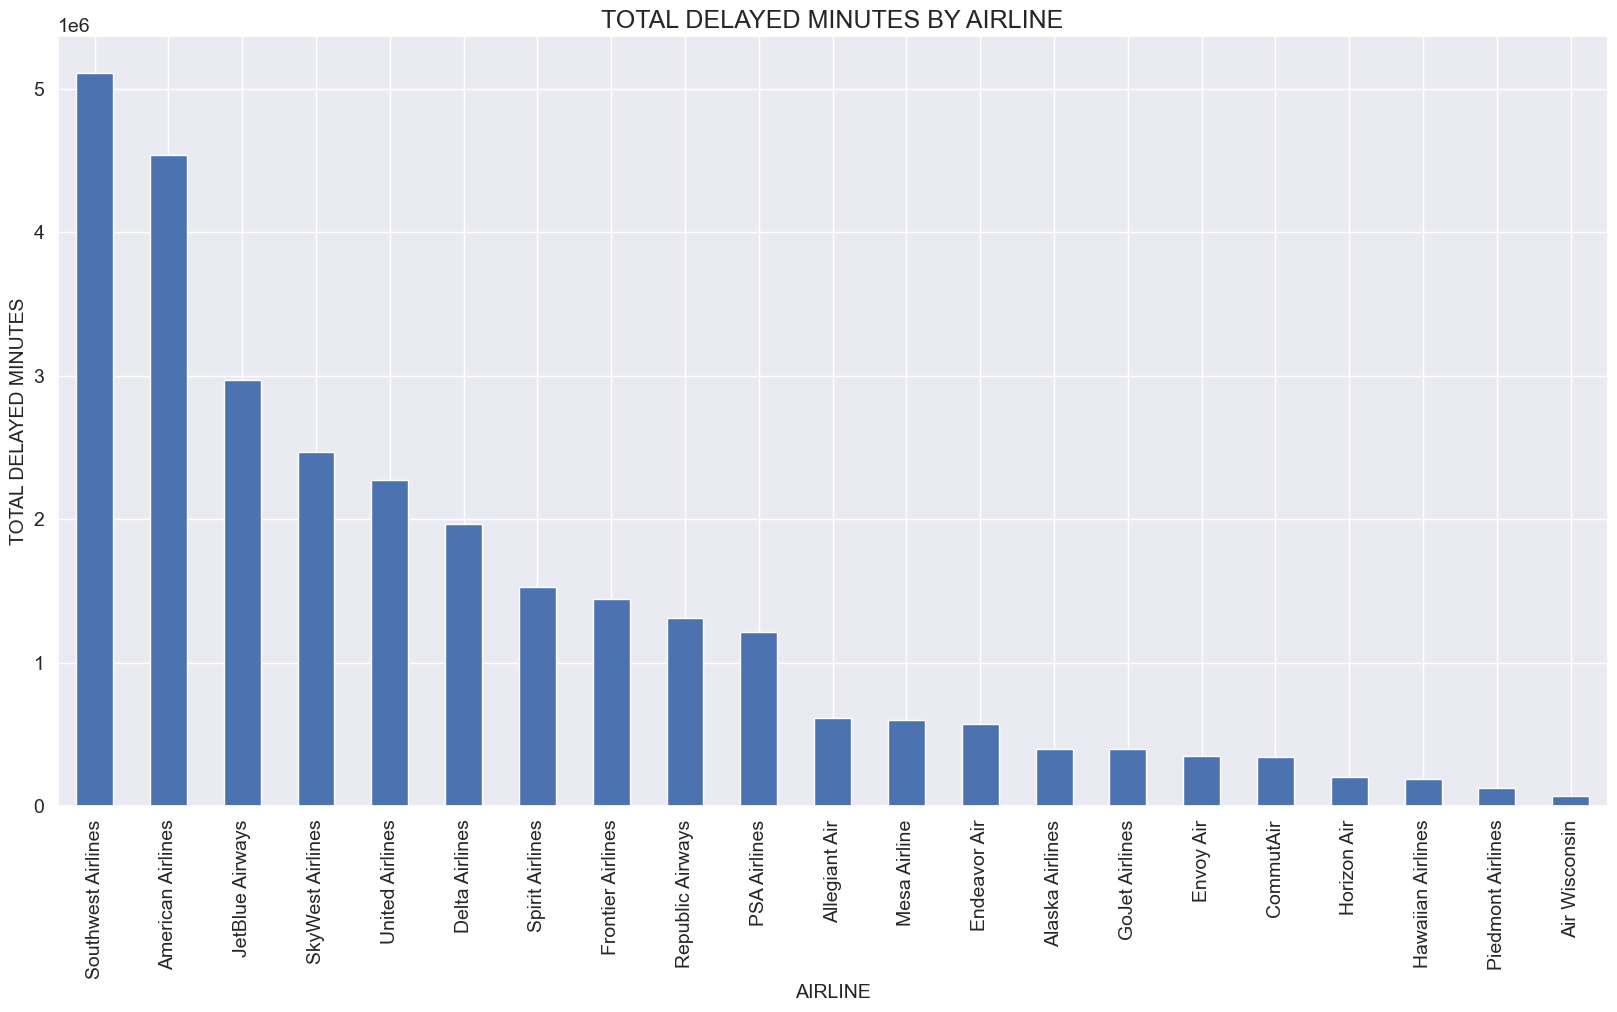

In [19]:
plt.figure(figsize=(20, 10))
df1.groupby('Operating_Airline').ArrDelay.sum().sort_values(ascending=False).plot.bar()
plt.title('TOTAL DELAYED MINUTES BY AIRLINE', fontsize=18)
plt.xlabel('AIRLINE', fontsize=14)
plt.ylabel('TOTAL DELAYED MINUTES', fontsize=14)
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)
plt.show()

This is another interesting plot that reveals again something positive about Delta Airlines. Even when it is at the top in terms of number of delayed flights, the total number of minutes delayed is negative and it is the lowest of all. How come is it negative? because there are a lot of flights that arrive earlier than what was expected, and therefore the ARR_DELAY is a negative number instead of a positive one 

This brings another possible plot to look at, Average of minutes per delay by airline. I will try to do this once I have address the other questions.

## Average Delay Time per Airline

For the sake of making the visualization faster and easier I will create a separate dataframe with only two columns: OP_CARRIER (airline) and ARR_DELAY (DELAY) and I will call it test_3. I will also sort the average delay on the arrival column in ascending order. The reason why I am choosing ascending order is because this is a negative statistics, therefore, the airlines with the lowest values will be the better ones, and I'm interested to see the best airlines first. 

In [20]:
df1.head(2)

,FlightDate,Operating_Airline,Origin,Dest,CRSDepTime,DepDelay,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,CRSElapsedTime,ActualElapsedTime,AirTime,Distance,DAY,MONTH,MONTH_AB,FLIGHT_STATUS
0,2022-04-04,CommutAir,Grand Junction,Denver,2,-10.0,17.0,2,3,8.0,3,-17.0,72.0,65.0,40.0,212.0,4,4,Apr,0
1,2022-04-04,CommutAir,Harlingen,Houston,2,-4.0,16.0,2,2,9.0,2,-1.0,77.0,80.0,55.0,295.0,4,4,Apr,0


In [21]:
test_3 = df1[['Operating_Airline', 'ArrDelay']]
test_3 = test_3.groupby(['Operating_Airline']).mean().reset_index()
test_3.rename({'ArrDelay': 'AVG_DELAY'}, axis=1, inplace=True)
test_3 = test_3.sort_values(['AVG_DELAY']).reset_index(drop=True)
test_3.head(18)

,Operating_Airline,AVG_DELAY
0,Air Wisconsin,1.819183
1,Envoy Air,2.405762
2,Piedmont Airlines,2.857223
3,Alaska Airlines,3.184787
4,Delta Airlines,3.925805
5,Endeavor Air,4.164953
6,Horizon Air,4.372731
7,Hawaiian Airlines,4.489443
8,SkyWest Airlines,6.009022
9,United Airlines,6.643770


I won't explain every step of how I create this last dataframe as it is very similar to the previous one (df_fp)

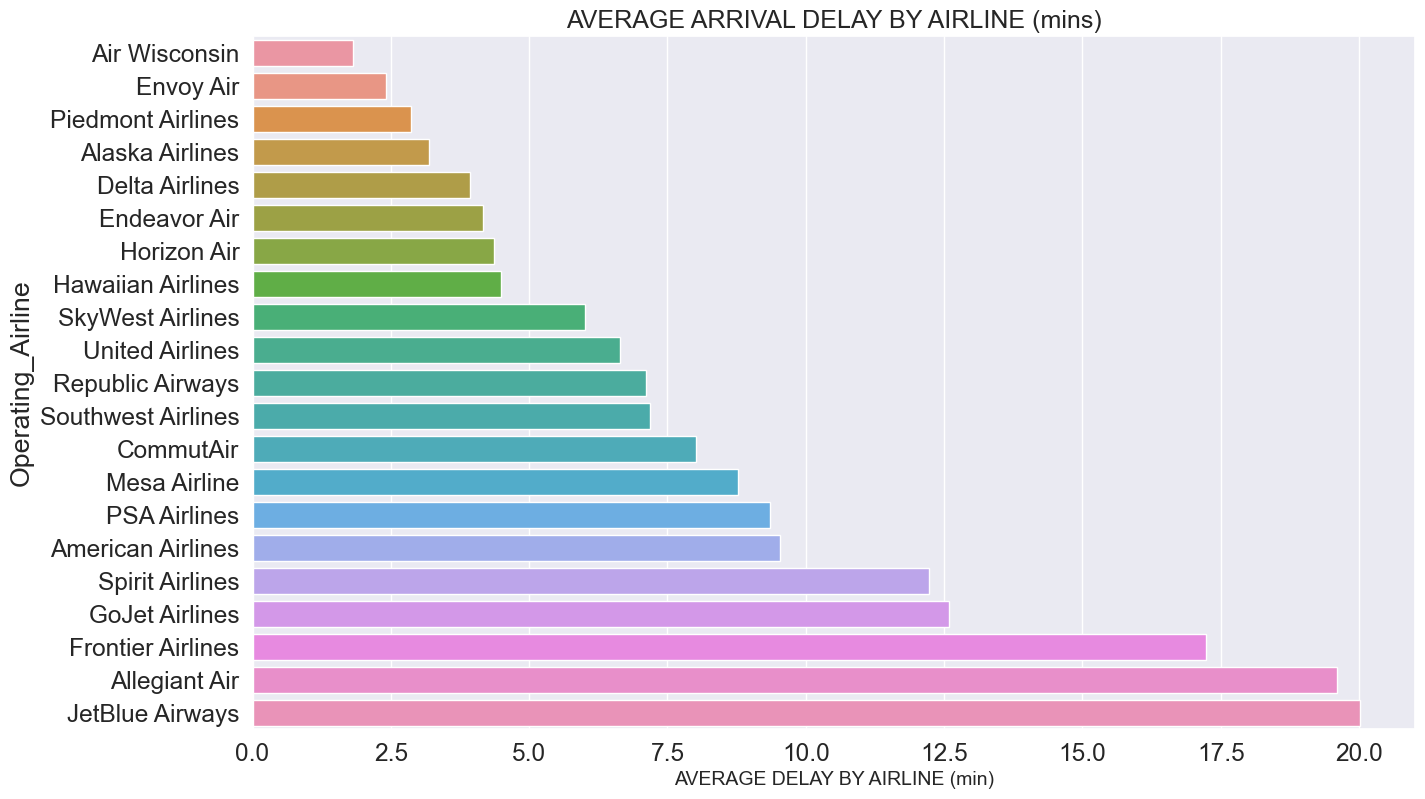

In [22]:
fig = plt.figure(1, figsize=(15,9))
sns.set(font_scale=1.6)
ax = sns.barplot(x='AVG_DELAY', y='Operating_Airline', data=test_3)
ax.set_title('AVERAGE ARRIVAL DELAY BY AIRLINE (mins)', fontsize=18)
ax.set_xlabel('AVERAGE DELAY BY AIRLINE (min)', fontsize=14)
plt.show()

Another interesting plot highlighting again Delta Airlines as a top tier airline.

We know that Delta is top 5 in terms of number of flights, also top 5 in delayed flights. This last one because of the number of flights they operate, but when we look at other values such as the percentage or delayed flights, they are the best, also with the total minutes delayed, they are in negative, and now with the average delayed minutes, they are again in negative. So a quick conclusion here is that Delta Airlines even when they have a lot of delayed flights, the delays are minimal (in average negative)

## 20 Most Common Destination (Cities)

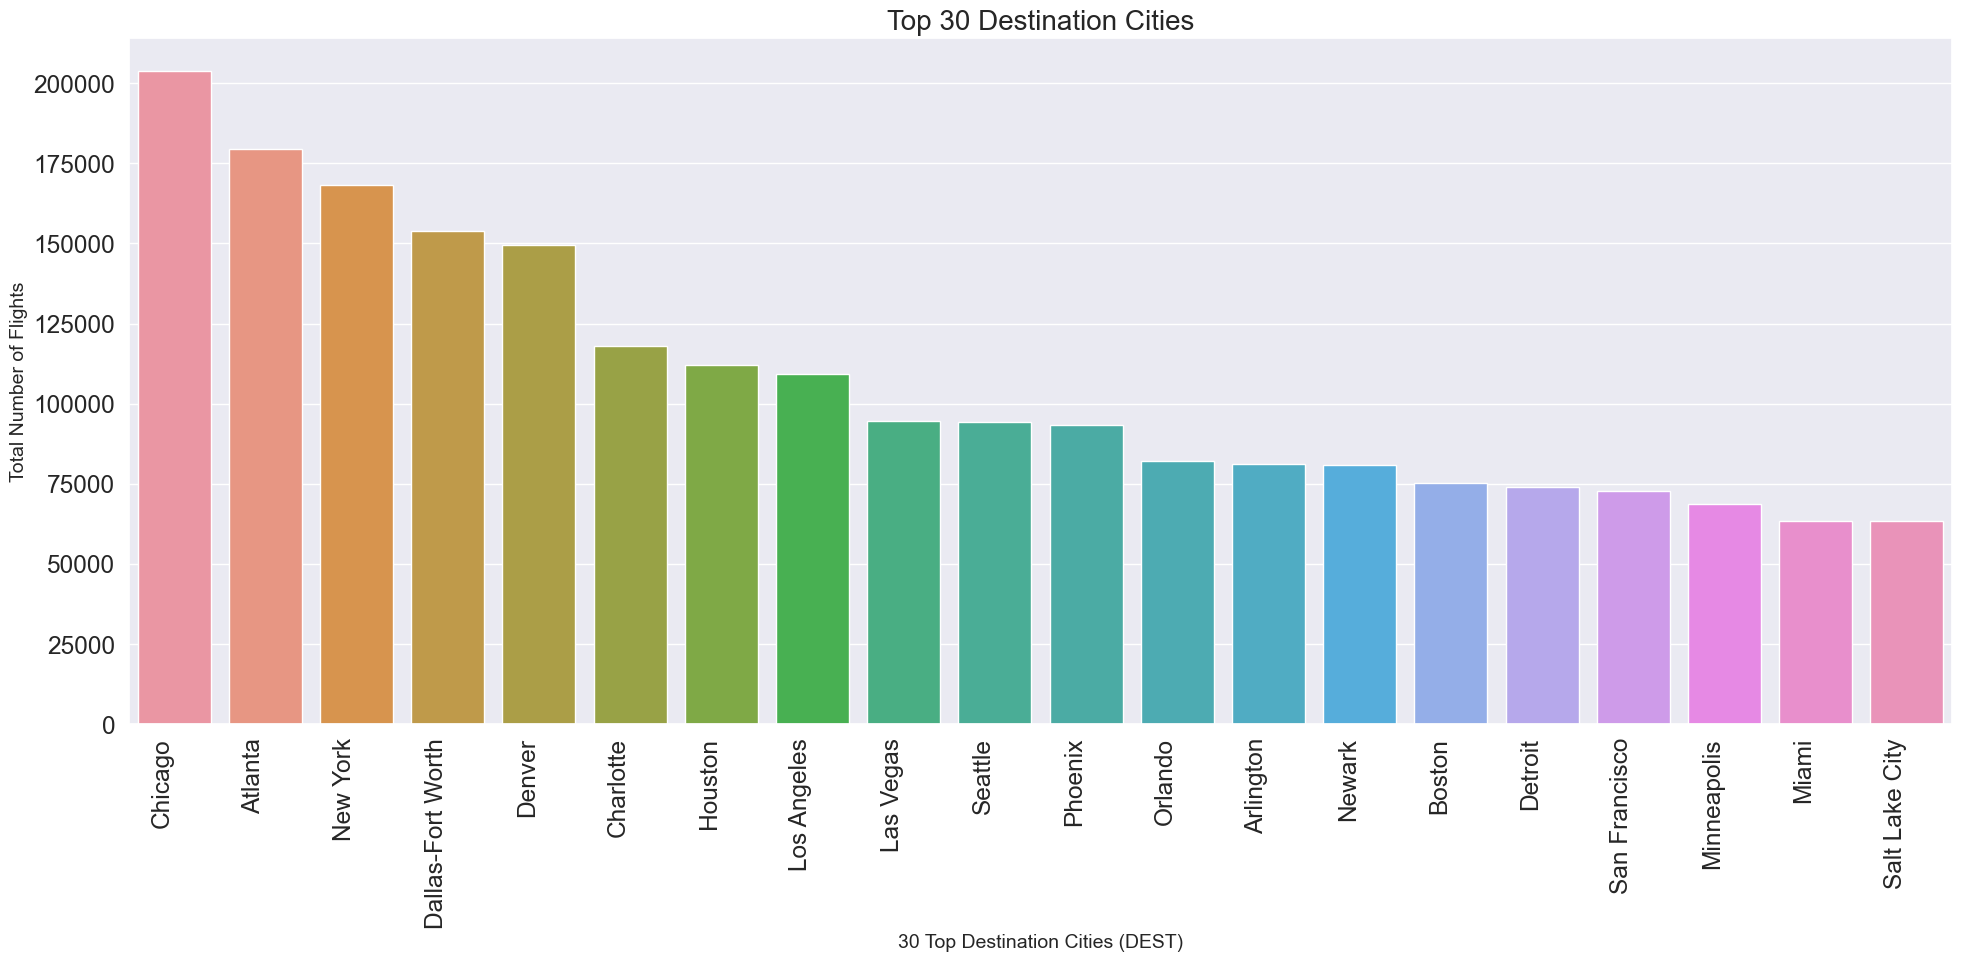

In [23]:
plt.figure(figsize=(20, 10))
sns.set(font_scale=1.6)
axis = sns.countplot(x=df1['Dest'], data=df1, order=df1['Dest'].value_counts().iloc[0:20].index)
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha='right')
plt.title('Top 30 Destination Cities', fontsize=20)
plt.xlabel('30 Top Destination Cities (DEST)', fontsize=14)
plt.ylabel('Total Number of Flights', fontsize=14)
plt.tight_layout()
plt.show()

## Worse & Best months to travel based on flight delays

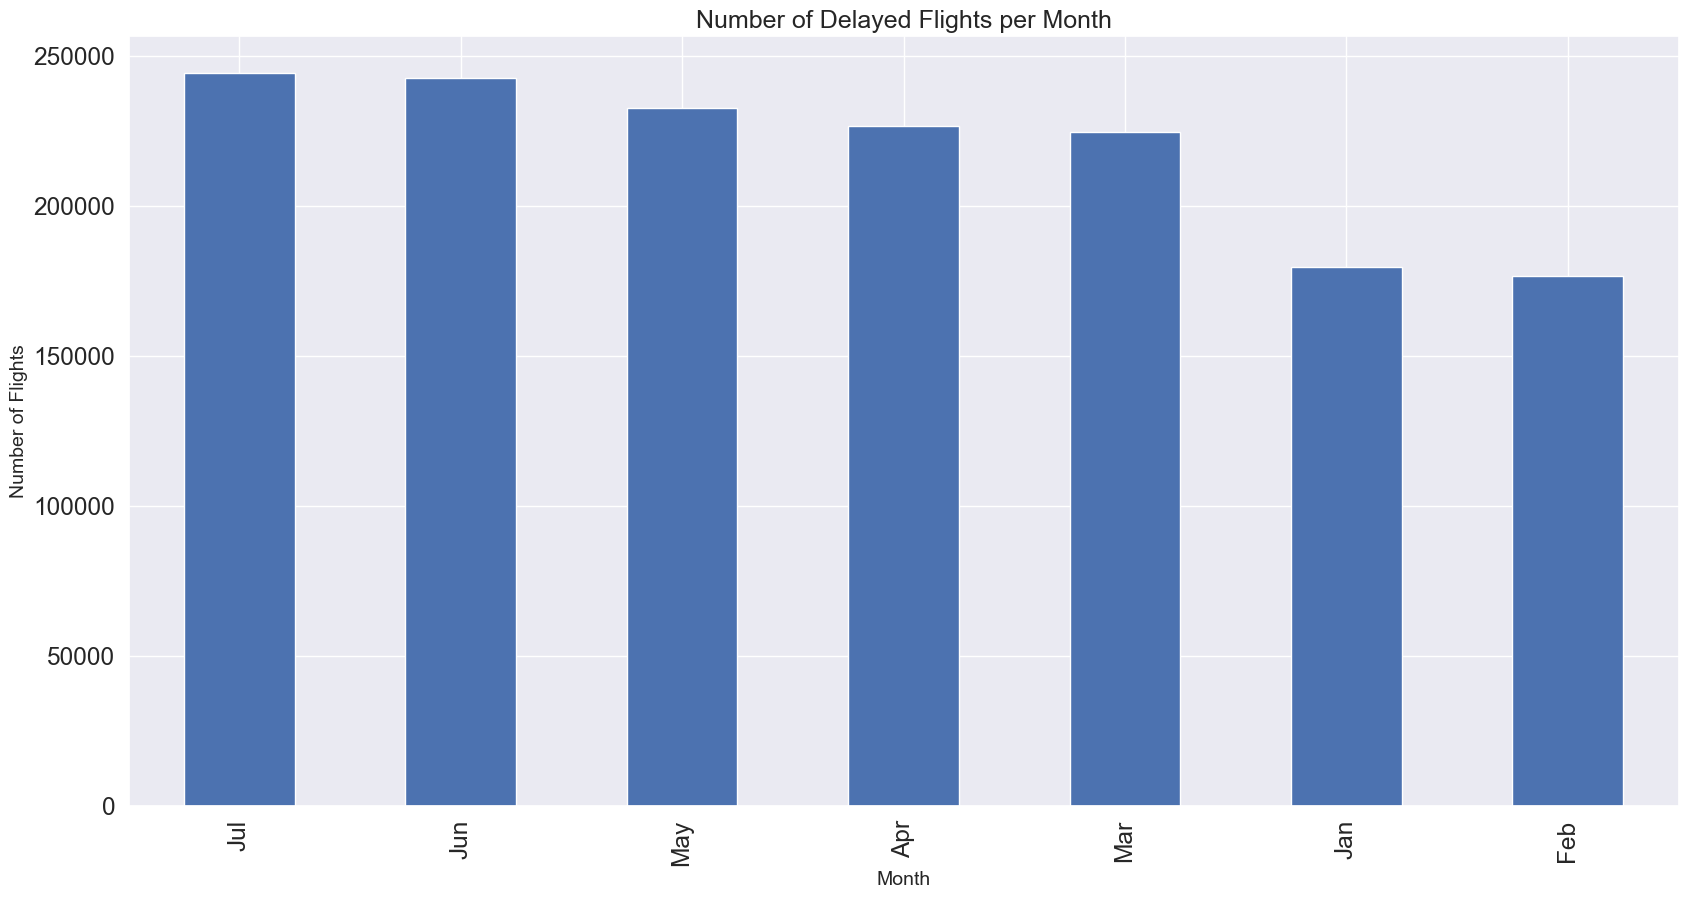

In [24]:
plt.figure(figsize=(20, 10))
df1.groupby('MONTH_AB').FLIGHT_STATUS.sum().sort_values(ascending=False).plot.bar()
plt.title('Number of Delayed Flights per Month', fontsize=18)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Flights', fontsize=14)
plt.show()

According to this data the months with the most delayed flights are July, August, June and May, so basically the summer months. These are followed to November, December and October, which are the end of year including Christmas. The best months to travel are February, January and September, clearly after the standard holidays (summer and Christmas) 

How about the day of the month? do you think there is a difference? we can quickly calculate that as well, but first lets try to quickly, only for comparison purposes, create a cake plot with these values to see if it offer s better visuals:

## Is there a better day to travel?

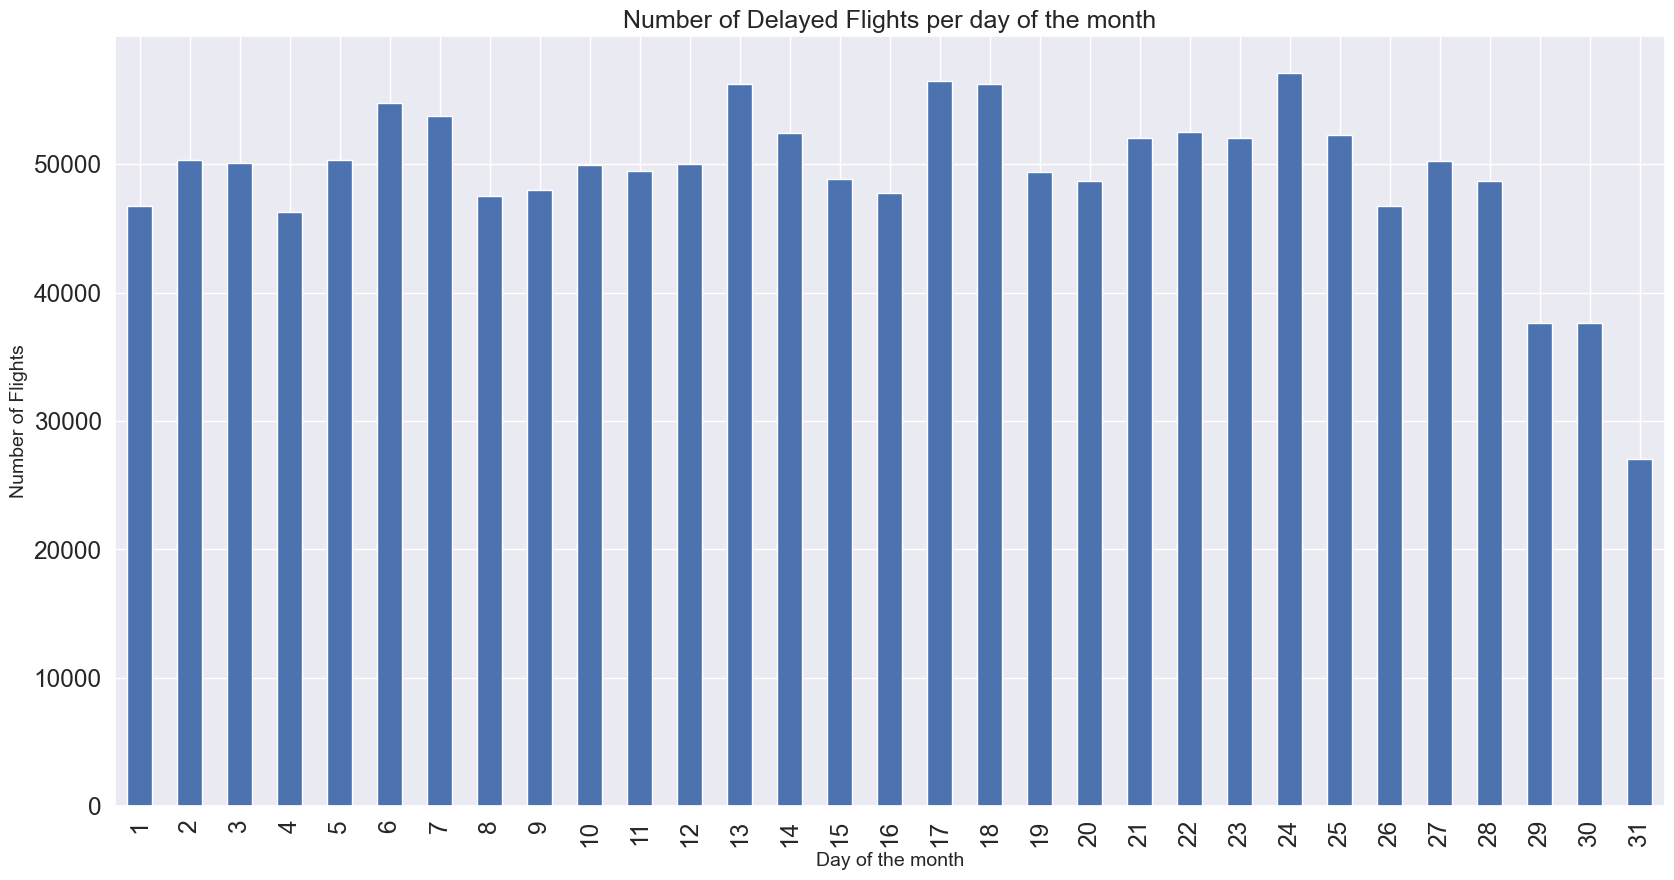

In [25]:
plt.figure(figsize=(20, 10))
df1.groupby('DAY').FLIGHT_STATUS.sum().plot.bar()
plt.title('Number of Delayed Flights per day of the month', fontsize=18)
plt.xlabel('Day of the month', fontsize=14)
plt.ylabel('Number of Flights', fontsize=14)
plt.show()

The first look I tried respecting the month day order, so starting with the 1st until 31st, however, the 31st I will disregard as it happens half the year, therefore let's try to identify any trend until the 30th. With this trend it is actually very hard to find a series of days (trend). The values go just up and down, so I will conclude that they are inconclusive. Let's see what happens if I order these values in descending order:

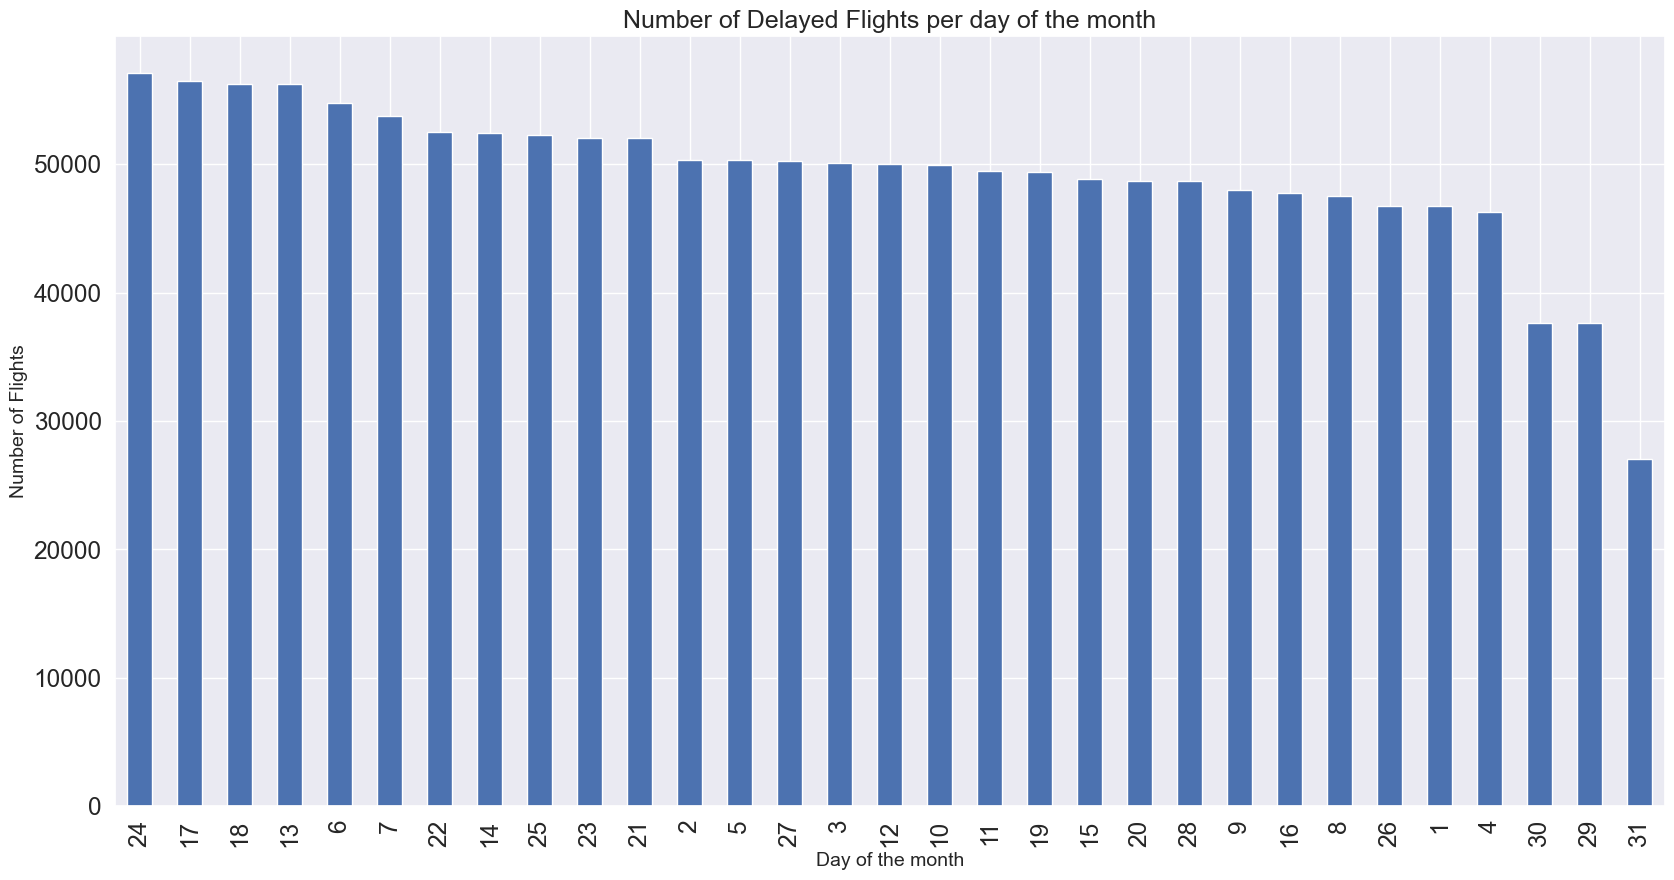

In [26]:
plt.figure(figsize=(20, 10))
barplot =df1.groupby('DAY').FLIGHT_STATUS.sum().sort_values(ascending=False).plot.bar()
plt.title('Number of Delayed Flights per day of the month', fontsize=18)
plt.xlabel('Day of the month', fontsize=14)
plt.ylabel('Number of Flights', fontsize=14)
plt.show()

Once again, not much can be said. The only observation is that the 29th and 30th seem to be days with less flights delayed. Still I don't think that this is a solid theory enough to make that conclusion. so I will leave this for the reader to decide.  

## Impact of Delays (Departure vs. Arrival Delay)

In this next visualization what I will try to do is analyze both, the departure and the arrival delay. I want to see which one of both has a bigger impact on the plane being late overall. 

I am assuming that if your departure is on time and the flight is late on arrival, then this means that something else increased your elapse time, which is supposed to be the planned time needed for the flight trip. 

This plot should also confirm the theory that some airlines when having a delay from their departure try to compensate by reducing their air time. At this point that is just a theory so we will see.

In order to do this, I will use a different type of plot, where I will overlay the ARR_DELAY over the DEP_DELAY and see how they behave: 

In [27]:
mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams['hatch.linewidth'] = 1.8  

fig = plt.figure(1, figsize=(15,9))
ax = sns.barplot(x="DepDelay", y="Operating_Airline", data=df1, color="lightskyblue", ci=None)
ax = sns.barplot(x="ArrDelay", y="Operating_Airline", data=df1, color="r", hatch = '///', alpha = 0.0, ci=None)
ax.yaxis.label.set_visible(False)
plt.title('Departure vs Arrival Delay')
plt.xlabel('Mean delay (min)', fontsize=14, labelpad=10);

The departure delay (DEP_DELAY) is the light blue color, whereas the arrival delay (ARR_DELAY) is the dashed line.

The results of the plot are quite interesting suggesting that the ARR_DELAYS are generally lower than the DEP_DELAYS, and as mentioned above, this suggests that the airlines try to adjust their flight speed to try and compensate for the late departure and reduce the ARR_DELAY.                                                   

Another interesting piece of information is related to Delta Airlines. Once again, the arrivals are negative. This means that even when they leave late, they are a good airline compensating by reducing the time of the flights to arrive on time or in average, earlier as the plot suggest.

In [28]:
df1_LA = df1[(df1['ArrDelay'] >= 15)]

In [29]:
df1.shape

(3863219, 20)

In [30]:
df1_LA.shape

(832864, 20)

In [31]:
df1_LD = df1[(df1['DepDelay'] > 15)]
df1_LD.shape

(812901, 20)

In [32]:
df1_LD.DepDelay.describe()

count    812901.000000
mean         69.818474
std          95.462427
min          16.000000
25%          25.000000
50%          42.000000
75%          79.000000
max        7223.000000
Name: DepDelay, dtype: float64

<a href="https://en.wikipedia.org/wiki/Flight_cancellation_and_delay">Late Departure</a>

## Most Popular Destination with Average Arrival Delays

In [33]:
df1.head()

,FlightDate,Operating_Airline,Origin,Dest,CRSDepTime,DepDelay,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,CRSElapsedTime,ActualElapsedTime,AirTime,Distance,DAY,MONTH,MONTH_AB,FLIGHT_STATUS
0,2022-04-04,CommutAir,Grand Junction,Denver,2,-10.0,17.0,2,3,8.0,3,-17.0,72.0,65.0,40.0,212.0,4,4,Apr,0
1,2022-04-04,CommutAir,Harlingen,Houston,2,-4.0,16.0,2,2,9.0,2,-1.0,77.0,80.0,55.0,295.0,4,4,Apr,0
2,2022-04-04,CommutAir,Durango,Denver,3,-15.0,21.0,3,3,14.0,3,-3.0,70.0,82.0,47.0,251.0,4,4,Apr,0
3,2022-04-04,CommutAir,Houston,Gulfport-Biloxi,3,-5.0,16.0,3,3,4.0,3,-18.0,90.0,77.0,57.0,376.0,4,4,Apr,0
4,2022-04-04,CommutAir,Durango,Denver,2,0.0,19.0,2,3,8.0,3,6.0,70.0,76.0,49.0,251.0,4,4,Apr,1


In [34]:
test_4 = df1[['Dest', 'ArrDelay']]
test_4 = test_4.groupby(['Dest']).mean().reset_index()
test_4.head(10)

,Dest,ArrDelay
0,Aberdeen,0.342105
1,Abilene,6.337568
2,Adak,-0.813559
3,Agana,-0.976415
4,Aguadilla,28.094253
5,Akron,10.316742
6,Albany,10.222764
7,Albuquerque,7.142820
8,Alexandria,2.092459
9,Allentown,2.395022


In [35]:
test_4.shape

(303, 2)

In [36]:
test_5 = df1.Dest.value_counts().rename_axis('Dest').reset_index(name='FLIGHTS').iloc[0:30]
test_5.head(30)

,Dest,FLIGHTS
0,Chicago,203856
1,Atlanta,179427
2,New York,168241
3,Dallas-Fort Worth,153949
4,Denver,149574
5,Charlotte,118082
6,Houston,112094
7,Los Angeles,109249
8,Las Vegas,94755
9,Seattle,94204


In [37]:
test_4_5 = pd.merge(test_5, test_4, on='Dest')
test_4_5.head()

,Dest,FLIGHTS,ArrDelay
0,Chicago,203856,5.819991
1,Atlanta,179427,4.423247
2,New York,168241,11.397442
3,Dallas-Fort Worth,153949,7.698186
4,Denver,149574,7.092523


In [38]:
test_4_5.head()

,Dest,FLIGHTS,ArrDelay
0,Chicago,203856,5.819991
1,Atlanta,179427,4.423247
2,New York,168241,11.397442
3,Dallas-Fort Worth,153949,7.698186
4,Denver,149574,7.092523


Because of the high number of destinations (+340) I will only concentrate on the top 30 destinations.

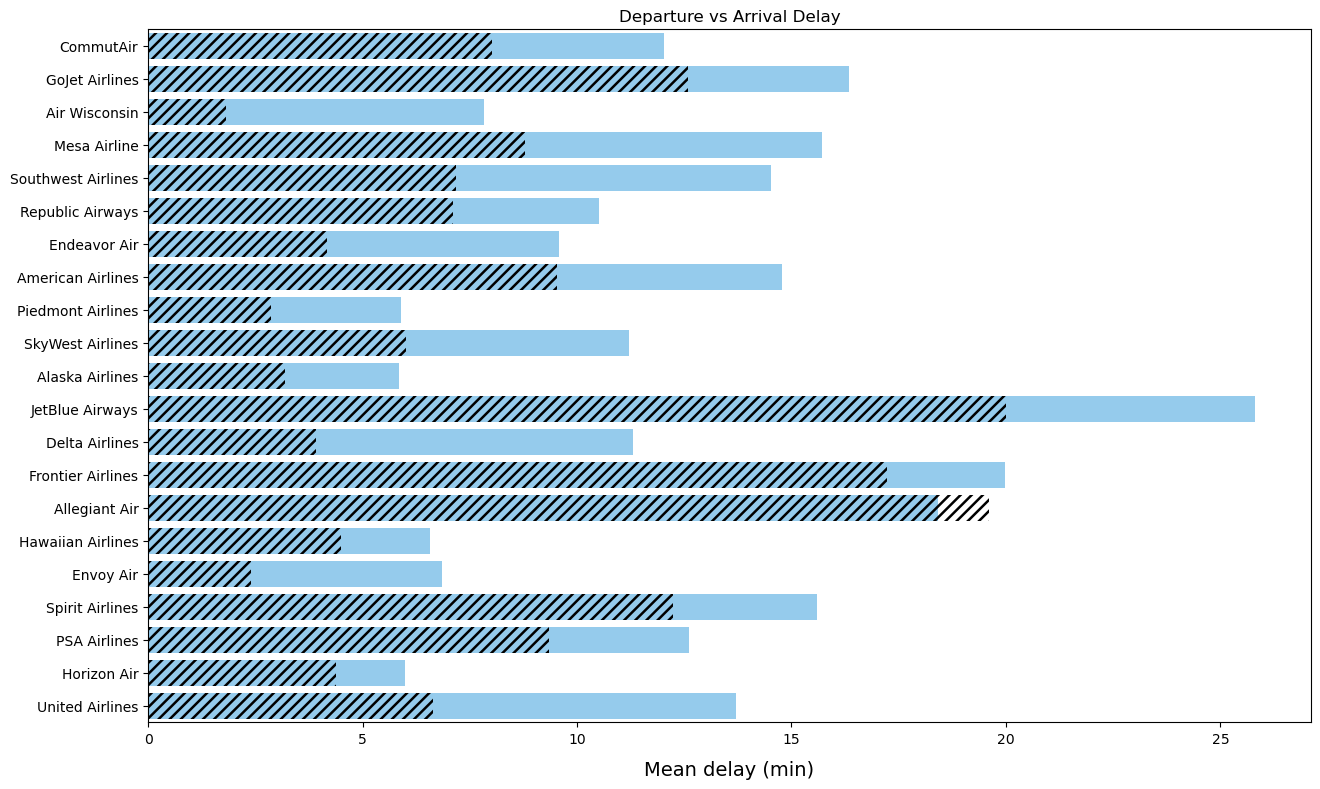

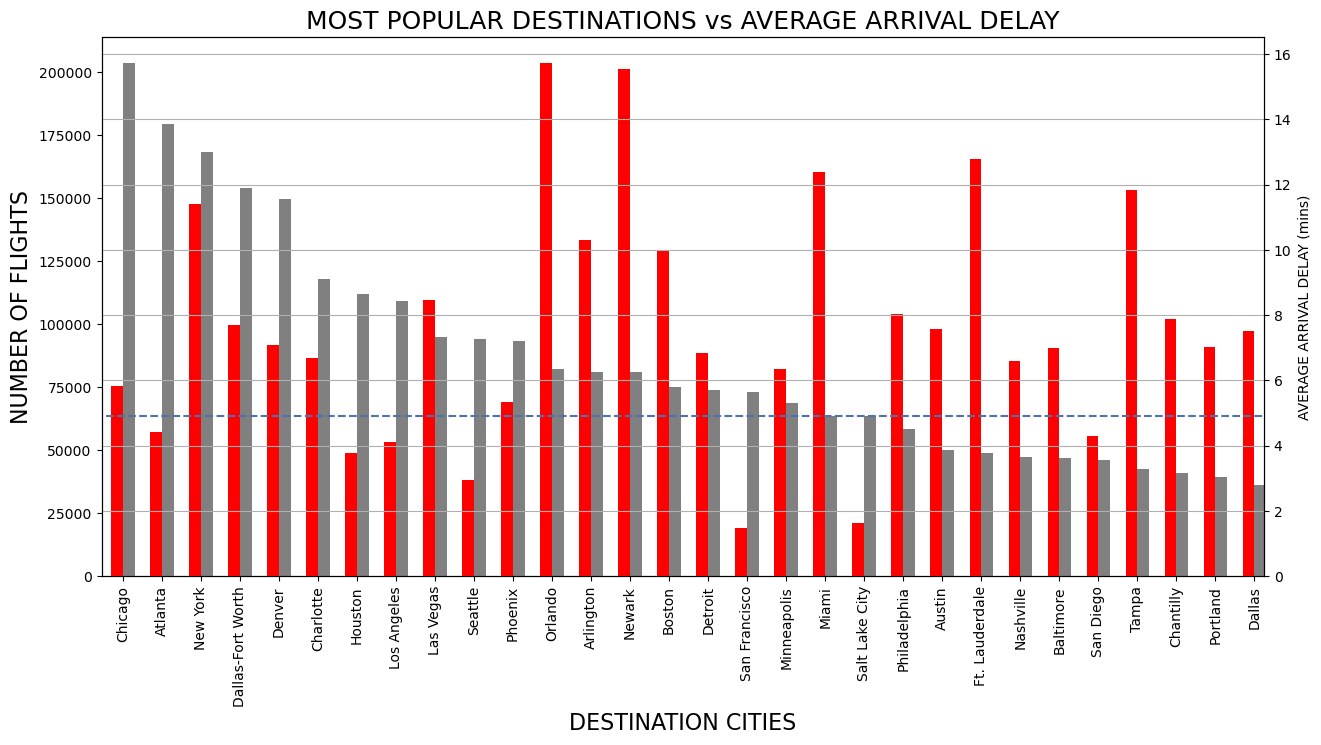

In [39]:
test_4_5 = test_4_5.set_index('Dest')

fig = plt.figure(figsize=(15,7)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as a
width = .3

test_4_5.FLIGHTS.plot(kind='bar',color='grey',ax=ax, width=width, position=0)
test_4_5.ArrDelay.plot(kind='bar',color='red', ax=ax2, width=width, position=1)

plt.hlines(y=4.90, xmin=-1, xmax=30, colors='b', linestyles='dashed', label='cutoff')

#ax.grid(None, axis=1)
ax2.grid(None)

ax.set_title('MOST POPULAR DESTINATIONS vs AVERAGE ARRIVAL DELAY', fontsize=18)
ax.set_ylabel('NUMBER OF FLIGHTS', fontsize=16)
ax2.set_ylabel('AVERAGE ARRIVAL DELAY (mins)')
ax.set_xlabel('DESTINATION CITIES', fontsize=16)

plt.show()

The dashed line that you see on the plot corresponds to the average delay on arrival of the top 30 destinations.  It is interesting to see how Atlanta, having such a high the number of landings, has a very low average delay with just over 2 minutes, whereas Newark, a not so popular destination, has such a high minute average delay. San Francisco is another destination that stands out with a high average delay as well as Orlando and Boston.

## Departure Cities with the most Delayed Departure Flights 

This is very similar to the previous exercise, so I won't write much explanations and get to the point

In [40]:
df1.head()

,FlightDate,Operating_Airline,Origin,Dest,CRSDepTime,DepDelay,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,CRSElapsedTime,ActualElapsedTime,AirTime,Distance,DAY,MONTH,MONTH_AB,FLIGHT_STATUS
0,2022-04-04,CommutAir,Grand Junction,Denver,2,-10.0,17.0,2,3,8.0,3,-17.0,72.0,65.0,40.0,212.0,4,4,Apr,0
1,2022-04-04,CommutAir,Harlingen,Houston,2,-4.0,16.0,2,2,9.0,2,-1.0,77.0,80.0,55.0,295.0,4,4,Apr,0
2,2022-04-04,CommutAir,Durango,Denver,3,-15.0,21.0,3,3,14.0,3,-3.0,70.0,82.0,47.0,251.0,4,4,Apr,0
3,2022-04-04,CommutAir,Houston,Gulfport-Biloxi,3,-5.0,16.0,3,3,4.0,3,-18.0,90.0,77.0,57.0,376.0,4,4,Apr,0
4,2022-04-04,CommutAir,Durango,Denver,2,0.0,19.0,2,3,8.0,3,6.0,70.0,76.0,49.0,251.0,4,4,Apr,1


In [41]:
test_6 = df1[['Origin', 'DepDelay']]
test_6 = test_6.groupby(['Origin']).mean().reset_index()
test_6.head(10)

,Origin,DepDelay
0,Aberdeen,12.973747
1,Abilene,5.981835
2,Adak,1.603448
3,Agana,12.194313
4,Aguadilla,25.203077
5,Akron,9.215903
6,Albany,12.853946
7,Albuquerque,10.590439
8,Alexandria,12.755062
9,Allentown,9.461384


In [42]:
test_7 = df1.Origin.value_counts().rename_axis('Origin').reset_index(name='FLIGHTS').iloc[0:30]
test_7.head(30)

,Origin,FLIGHTS
0,Chicago,204285
1,Atlanta,179556
2,New York,168656
3,Dallas-Fort Worth,154114
4,Denver,149771
5,Charlotte,118217
6,Houston,112206
7,Los Angeles,109144
8,Las Vegas,94748
9,Seattle,94440


In [43]:
test_6_7 = pd.merge(test_7, test_6, on='Origin')
test_6_7.head()

,Origin,FLIGHTS,DepDelay
0,Chicago,204285,13.792878
1,Atlanta,179556,11.593720
2,New York,168656,17.397318
3,Dallas-Fort Worth,154114,13.414408
4,Denver,149771,17.900481


In [44]:
test_6_7.shape

(30, 3)

In [45]:
test_6_7.head()

,Origin,FLIGHTS,DepDelay
0,Chicago,204285,13.792878
1,Atlanta,179556,11.593720
2,New York,168656,17.397318
3,Dallas-Fort Worth,154114,13.414408
4,Denver,149771,17.900481


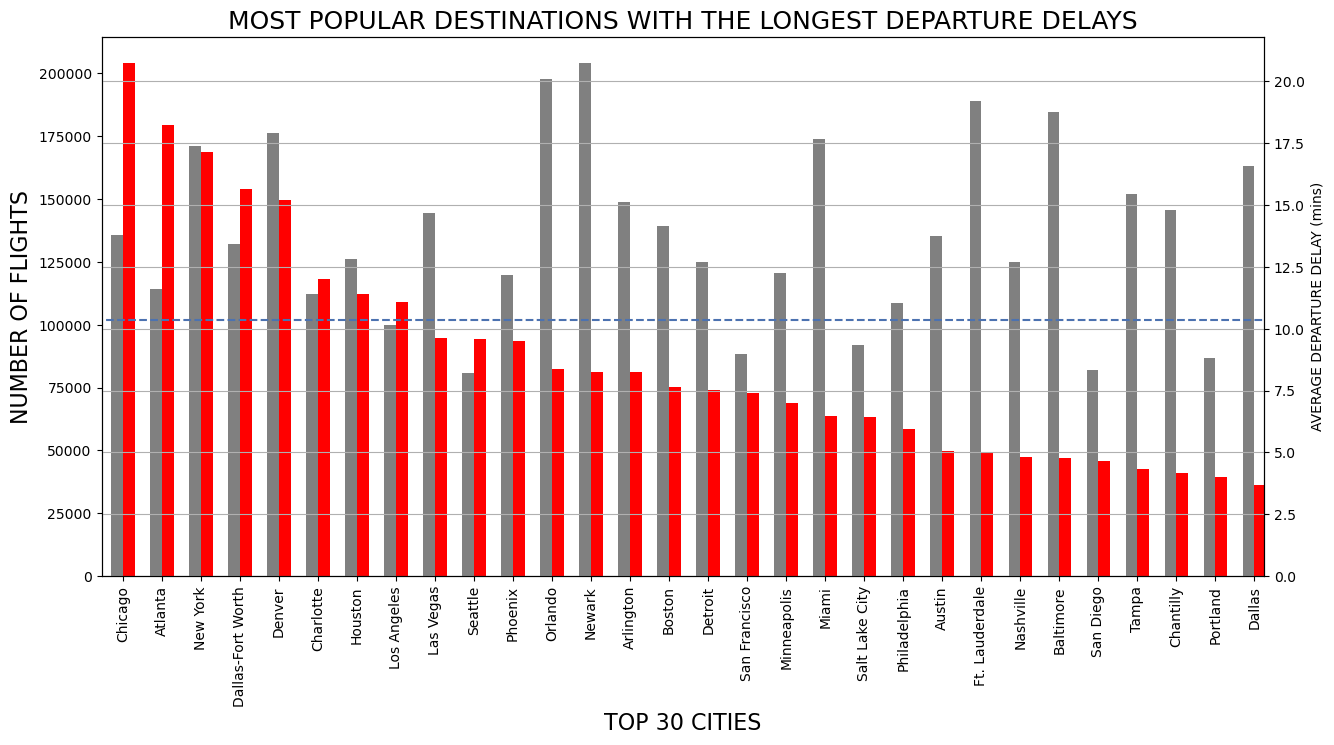

In [46]:
test_6_7 = test_6_7.set_index('Origin')

fig = plt.figure(figsize=(15,7)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis
width = .3

test_6_7.FLIGHTS.plot(kind='bar',color='red',ax=ax, width=width, position=0)
test_6_7.DepDelay.plot(kind='bar',color='grey', ax=ax2, width=width, position=1)

plt.hlines(y=10.345, xmin=-1, xmax=30, colors='b', linestyles='dashed', label='cutoff')

#ax.grid(None, axis=1)
ax2.grid(None)

ax.set_title('MOST POPULAR DESTINATIONS WITH THE LONGEST DEPARTURE DELAYS', fontsize=18)
ax.set_ylabel('NUMBER OF FLIGHTS', fontsize=16)
ax2.set_ylabel('AVERAGE DEPARTURE DELAY (mins)')
ax.set_xlabel('TOP 30 CITIES', fontsize=16)
plt.show()

This is probably one of the most interesting plots because of the information it gives. It is clear here the importance of the DEPARTURE DELAYS for the flights arriving on time. 

## Number of Destinations by Airline

In [47]:
cities = df1[['Operating_Airline', 'Dest', 'ArrDelay']]
cities = cities.groupby(['Operating_Airline', 'Dest']).mean().reset_index()

In [48]:
cities.Operating_Airline.value_counts()

SkyWest Airlines      228
Envoy Air             154
Delta Airlines        138
Mesa Airline          121
American Airlines     119
United Airlines       114
Endeavor Air          113
Southwest Airlines    104
Allegiant Air         103
PSA Airlines          101
Frontier Airlines      99
Republic Airways       96
CommutAir              83
Alaska Airlines        83
Air Wisconsin          79
JetBlue Airways        69
Piedmont Airlines      65
GoJet Airlines         63
Spirit Airlines        58
Horizon Air            49
Hawaiian Airlines      22
Name: Operating_Airline, dtype: int64

To see if this will work I will do a test to go around and get the number of cities that Delta Airlines travels to within thee US. I should bee getting a 148, and if this works then I'll continue with all the rest of the airlines

In [49]:
temp = cities[(cities['Operating_Airline'] == "Delta Airlines")]

In [50]:
temp.head()

,Operating_Airline,Dest,ArrDelay
467,Delta Airlines,Albany,9.318182
468,Delta Airlines,Albuquerque,-0.830696
469,Delta Airlines,Anchorage,-2.622097
470,Delta Airlines,Appleton,-4.953704
471,Delta Airlines,Arlington,9.229604


In [51]:
# I need to double check that this is really grabbing all the destinations per airline
# If it is I should be getting a 148.
temp.Dest.nunique()

138

It seems to have worked, so I will convert the that same output into a dataframe

In [52]:
cities_airline = cities.Operating_Airline.value_counts().rename_axis('Operating_Airline').reset_index(name='NUMBER_CITIES')
cities_airline.head(18)

,Operating_Airline,NUMBER_CITIES
0,SkyWest Airlines,228
1,Envoy Air,154
2,Delta Airlines,138
3,Mesa Airline,121
4,American Airlines,119
5,United Airlines,114
6,Endeavor Air,113
7,Southwest Airlines,104
8,Allegiant Air,103
9,PSA Airlines,101


It seems to have worked, so now to the visualization:

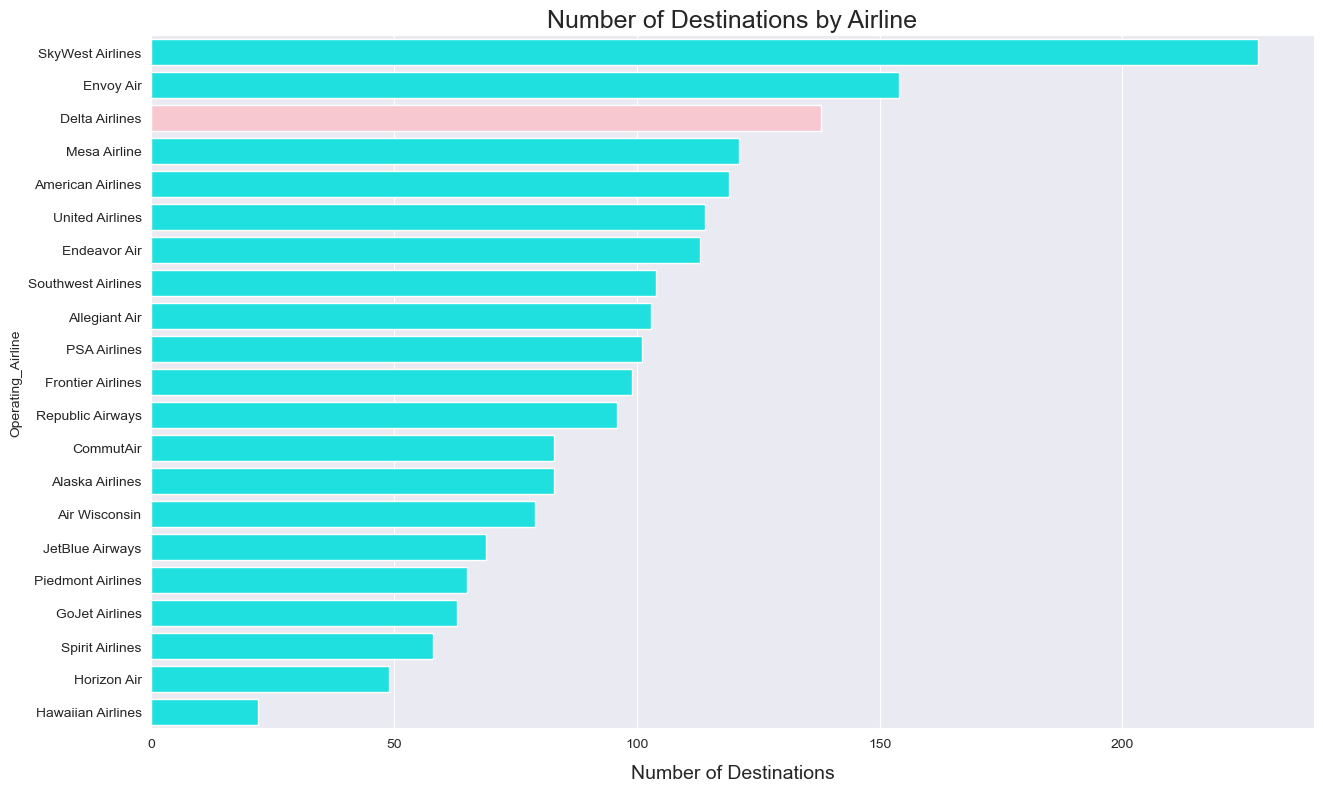

In [55]:
sns.set_style('darkgrid')

fig = plt.figure(1, figsize=(15,9))
ax = sns.barplot(x="NUMBER_CITIES", y="Operating_Airline", data=cities_airline, palette=["cyan" if y!='Delta Airlines' else "pink" for y in cities_airline.Operating_Airline])
plt.title('Number of Destinations by Airline', fontsize=18)
plt.xlabel('Number of Destinations', fontsize=14, labelpad=10);
plt.show()

Once again, Delta Airlines is in good position. This is no sense a sales pitch and me living far from the US and not knowing about their airlines makes it clear that I am just interpreting what I see with the EDA.

In [76]:
df1.columns

Index(['FlightDate', 'Operating_Airline', 'Origin', 'Dest', 'CRSDepTime',
       'DepDelay', 'TaxiOut', 'WheelsOff', 'WheelsOn', 'TaxiIn', 'CRSArrTime',
       'ArrDelay', 'CRSElapsedTime', 'ActualElapsedTime', 'AirTime',
       'Distance', 'DAY', 'MONTH', 'MONTH_AB', 'FLIGHT_STATUS'],
      dtype='object')

In [77]:
df1['ARR-DEP_DELAY'] = df1['ArrDelay'] - df1['DepDelay']
df1.head(3).append(df1.tail(3))

,FlightDate,Operating_Airline,Origin,Dest,CRSDepTime,DepDelay,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,CRSElapsedTime,ActualElapsedTime,AirTime,Distance,DAY,MONTH,MONTH_AB,FLIGHT_STATUS,ARR-DEP_DELAY
0,2022-04-04,CommutAir,Grand Junction,Denver,2,-10.0,17.0,2,3,8.0,3,-17.0,72.0,65.0,40.0,212.0,4,4,Apr,0,-7.0
1,2022-04-04,CommutAir,Harlingen,Houston,2,-4.0,16.0,2,2,9.0,2,-1.0,77.0,80.0,55.0,295.0,4,4,Apr,0,3.0
2,2022-04-04,CommutAir,Durango,Denver,3,-15.0,21.0,3,3,14.0,3,-3.0,70.0,82.0,47.0,251.0,4,4,Apr,0,12.0
4078310,2022-03-31,Republic Airways,Chantilly,Pittsburgh,3,195.0,14.0,4,4,5.0,4,180.0,71.0,56.0,37.0,182.0,31,3,Mar,1,-15.0
4078312,2022-03-19,Republic Airways,Newark,Memphis,4,154.0,14.0,4,1,5.0,4,135.0,182.0,163.0,144.0,946.0,19,3,Mar,1,-19.0
4078315,2022-03-08,Republic Airways,Albany,Chicago,3,378.0,19.0,4,1,7.0,4,381.0,158.0,161.0,135.0,723.0,8,3,Mar,1,3.0


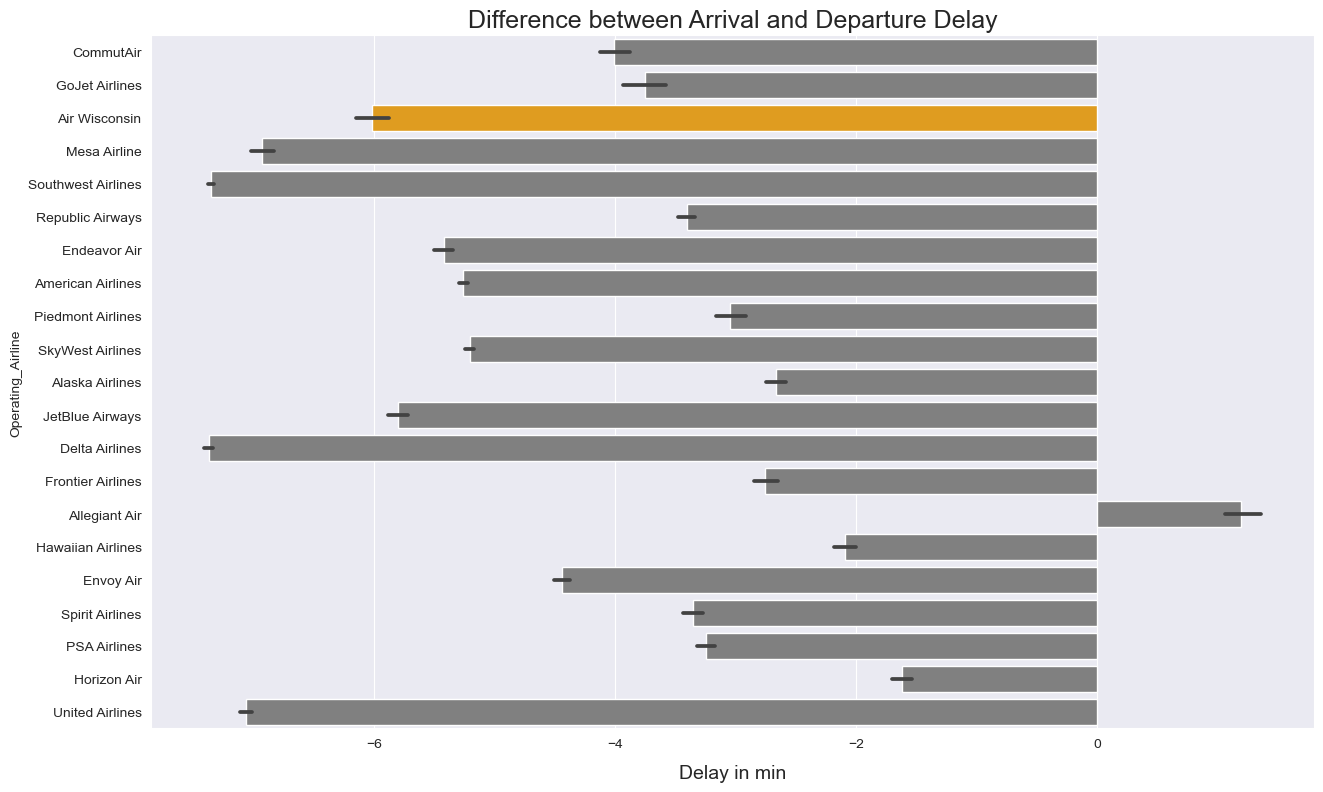

In [79]:
sns.set_style('darkgrid')

fig = plt.figure(1, figsize=(15,9))
ax = sns.barplot(x="ARR-DEP_DELAY", y="Operating_Airline", data=df1, palette=["grey" if y!='Delta Airlines' else "orange" for y in cities_airline.Operating_Airline])
plt.title('Difference between Arrival and Departure Delay', fontsize=18)
plt.xlabel('Delay in min', fontsize=14, labelpad=10);
plt.show()

# Visualizations - Sub-Plots

I'm going to create a new dataframe with the information of 4 others that I have already created with a a series of engineered features and then I'll use this one to generate 6 subplots. The idea here is to be able to compare all the airlines with multiple features/variables at the same time and not just limit ourselves to just one feature/variable. 

The dataframes that I will be using are the following 4:<br>

* df1<br>
* df_fp<br>
* test_3<br>
* citiess_airlines<br>

I will merge them on the OP_CARRIER which is the common feature that I tried to keep all along while engineering other features

In [80]:
df2 = pd.merge(df_fp, test_3, on='Operating_Airline')
df2 = pd.merge(df2, cities_airline, on='Operating_Airline')
df2.head(3)

,Operating_Airline,DELAYED_FLIGHTS,TOTAL_FLIGHTS,PERCENTAGE_DELAYED,AVG_DELAY,NUMBER_CITIES
0,Air Wisconsin,11427,38774,29.47,1.819183,79
1,Alaska Airlines,51824,124933,41.48,3.184787,83
2,Allegiant Air,18139,31217,58.11,19.603165,103


In [81]:
test_8 = df1[['Operating_Airline', 'ArrDelay']]
test_8.head(2)

,Operating_Airline,ArrDelay
0,CommutAir,-17.0
1,CommutAir,-1.0


In [82]:
test_8.shape

(3863219, 2)

In [83]:
test_8 = test_8.groupby('Operating_Airline').sum().sort_values(by=['ArrDelay']).reset_index()
test_8.rename({'ArrDelay': 'TOTAL_DELAY_MIN'}, axis=1, inplace=True)

In [84]:
df2 = pd.merge(df2, test_8, on='Operating_Airline')
df2 = df2.sort_values(by=['TOTAL_FLIGHTS'], ascending=False)
df2.head(18)

,Operating_Airline,DELAYED_FLIGHTS,TOTAL_FLIGHTS,PERCENTAGE_DELAYED,AVG_DELAY,NUMBER_CITIES,TOTAL_DELAY_MIN
18,Southwest Airlines,323258,712246,45.39,7.176226,104,5111238.0
5,Delta Airlines,169378,500710,33.83,3.925805,138,1965690.0
3,American Airlines,193430,475871,40.65,9.528696,119,4534430.0
17,SkyWest Airlines,138653,410347,33.79,6.009022,228,2465784.0
20,United Airlines,128726,342487,37.59,6.643770,114,2275405.0
16,Republic Airways,69665,183728,37.92,7.115949,96,1307399.0
12,JetBlue Airways,73050,148527,49.18,20.009015,69,2971879.0
7,Envoy Air,50799,144698,35.11,2.405762,154,348109.0
6,Endeavor Air,41997,136487,30.77,4.164953,113,568462.0
14,PSA Airlines,51050,129792,39.33,9.355091,101,1214216.0


Perfect! it worked and we have now a fully new dataframe with 6 engineered columns and the OP_CARRIER corresponding to the airlines. So now to the final plot that I will be doing before going into the modeling notebook...

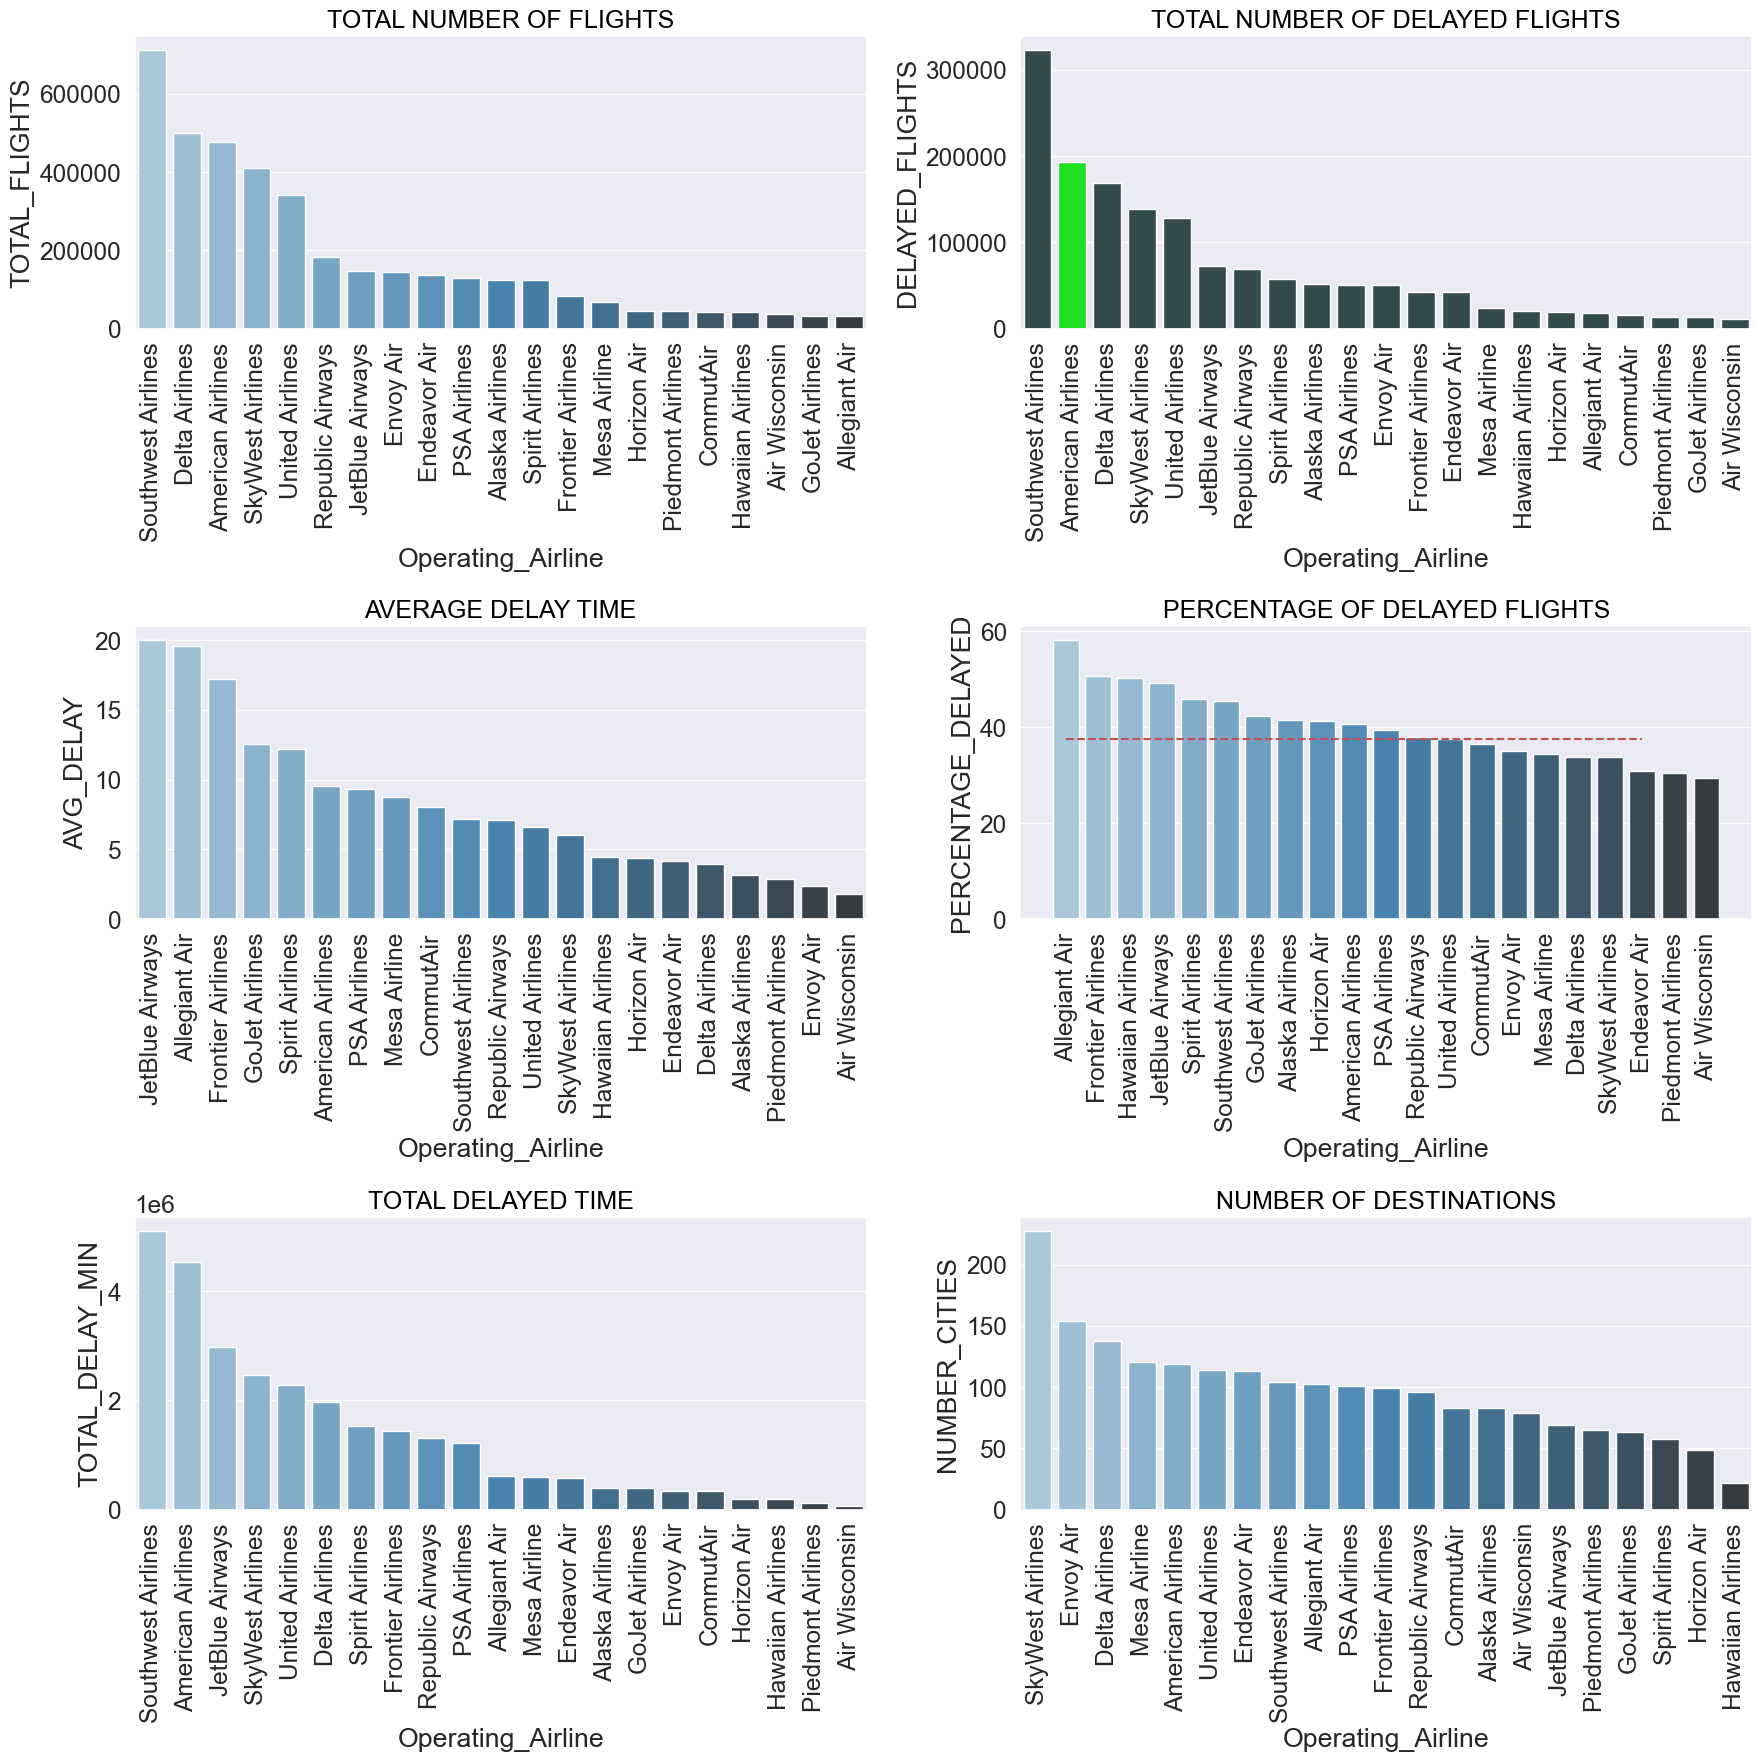

In [90]:
#highlight = "Delta Airlines"
#pos = df1.OP_CARRIER.get_loc(highlight)

fig = plt.figure(figsize=(18, 18))
sns.set(font_scale=1.6)
sub1 = fig.add_subplot(321) # instead of plt.subplot(3, 2, 1)
sub1.set_title('TOTAL NUMBER OF FLIGHTS', fontsize=18, color="black")
sub1 = sns.barplot(x="Operating_Airline", y="TOTAL_FLIGHTS", data=df2, palette="Blues_d", ax=sub1)
#sub1 = sns.barplot(x="OP_CARRIER", y="TOTAL_FLIGHTS", data=df2, palette=["darkslategray" if x!="Delta Airlines" else "lime" for x in df2.OP_CARRIER], ax=sub1)
sub1.set_xticklabels(sub1.get_xticklabels(), rotation=90)

sub2 = fig.add_subplot(322)
sub2.set_title('TOTAL NUMBER OF DELAYED FLIGHTS', fontsize=18, color="black")

sub2 = sns.barplot(x="Operating_Airline", y="DELAYED_FLIGHTS", data=df2, order=df2.sort_values('DELAYED_FLIGHTS', ascending=False).Operating_Airline, palette=["darkslategray" if x!="Delta Airlines" else "lime" for x in df2.Operating_Airline], ax=sub2)
sub2.set_xticklabels(sub2.get_xticklabels(), rotation=90)

sub3 = fig.add_subplot(323)
sub3.set_title('AVERAGE DELAY TIME', fontsize=18, color="black")
sub3 = sns.barplot(x="Operating_Airline", y="AVG_DELAY", data=df2, order=df2.sort_values('AVG_DELAY', ascending=False).Operating_Airline, palette="Blues_d", ax=sub3)
#sub3 = sns.barplot(x="OP_CARRIER", y="AVG_DELAY", data=df2, order=df2.sort_values('AVG_DELAY', ascending=False).OP_CARRIER, palette=["darkslategray" if x!="Delta Airlines" else "lime" for x in df2.OP_CARRIER], ax=sub3)
sub3.set_xticklabels(sub3.get_xticklabels(), rotation=90)

sub4 = fig.add_subplot(324)
sub4.set_title('PERCENTAGE OF DELAYED FLIGHTS', fontsize=18, color="black")
sub4 = sns.barplot(x="Operating_Airline", y="PERCENTAGE_DELAYED", data=df2, order=df2.sort_values('PERCENTAGE_DELAYED', ascending=False).Operating_Airline, palette="Blues_d", ax=sub4)
sub4.set_xticklabels(sub4.get_xticklabels(), rotation=90)
plt.hlines(y=37.52, xmin=0, xmax=18, colors='r', linestyles='dashed', label='cutoff')

sub5 = fig.add_subplot(325)
sub5.set_title('TOTAL DELAYED TIME', fontsize=18, color="black")
sub5 = sns.barplot(x="Operating_Airline", y="TOTAL_DELAY_MIN", data=df2, order=df2.sort_values('TOTAL_DELAY_MIN', ascending=False).Operating_Airline, palette="Blues_d", ax=sub5)
sub5.set_xticklabels(sub5.get_xticklabels(), rotation=90)

sub6 = fig.add_subplot(326)
sub6.set_title('NUMBER OF DESTINATIONS', fontsize=18, color="black")
sub6 = sns.barplot(x="Operating_Airline", y="NUMBER_CITIES", data=df2, order=df2.sort_values('NUMBER_CITIES', ascending=False).Operating_Airline, palette="Blues_d", ax=sub6)
sub6.set_xticklabels(sub6.get_xticklabels(), rotation=90)

fig.tight_layout()

plt.show()